## <b> Problem Description </b>

### The objective at hand entails the development of a predictive model aimed at estimating the complete duration of taxi journeys within New York City. The principal dataset employed for this endeavor has been made public by the NYC Taxi and Limousine Commission. This dataset encompasses key attributes such as pickup time, geographical coordinates, passenger count, and an array of additional variables that contribute to the analysis.

Project Type - EDA/Regression

Contribution - Individual

# **Project Summary -**

The scope of my assignment involves the construction of a predictive model designed to forecast the complete duration of taxi excursions in the urban expanse of New York City. The central dataset employed for this initiative has been divulged by the esteemed NYC Taxi and Limousine Commission. This dataset encompasses pivotal parameters such as the precise pickup time, geographical coordinates, passenger count, and an assortment of supplementary variables that collectively contribute to the analytical process.

# **GitHub Link -**

Problem Statement

**Predicting total ride duration of taxi trips in New York City.**

#ROAD MAP

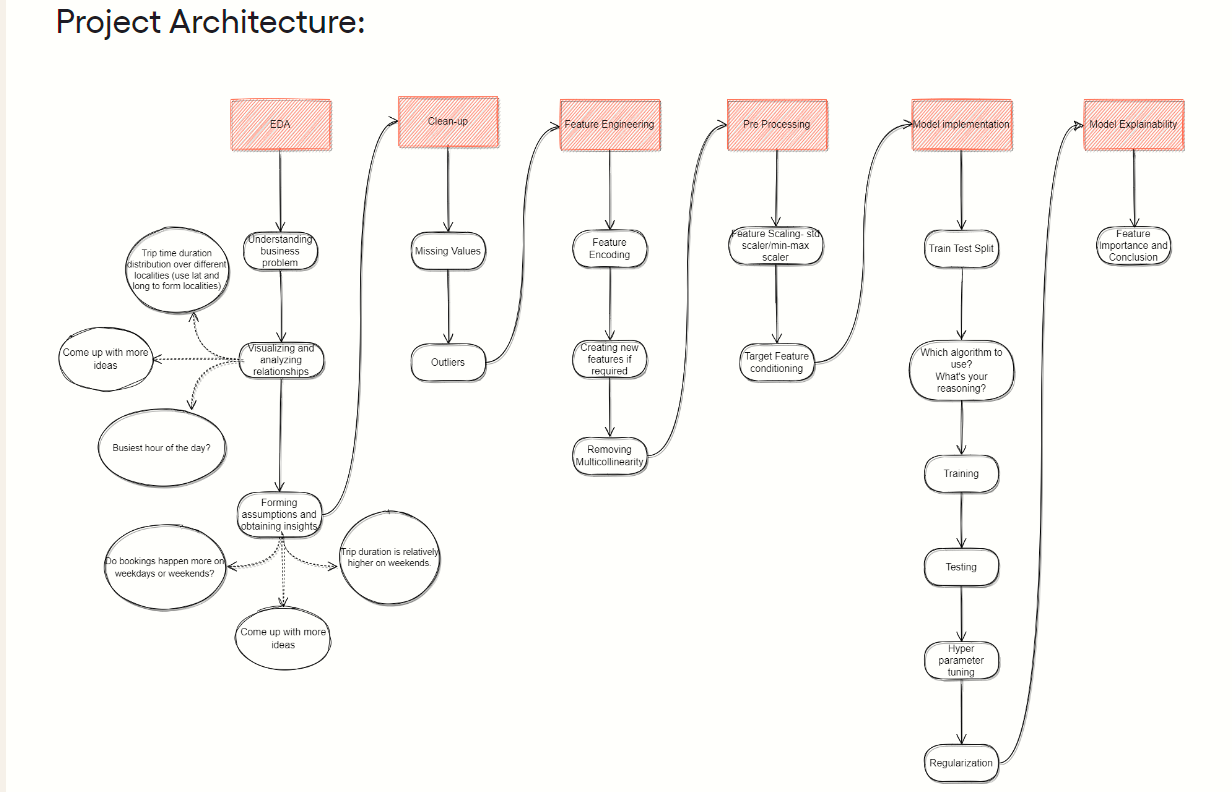

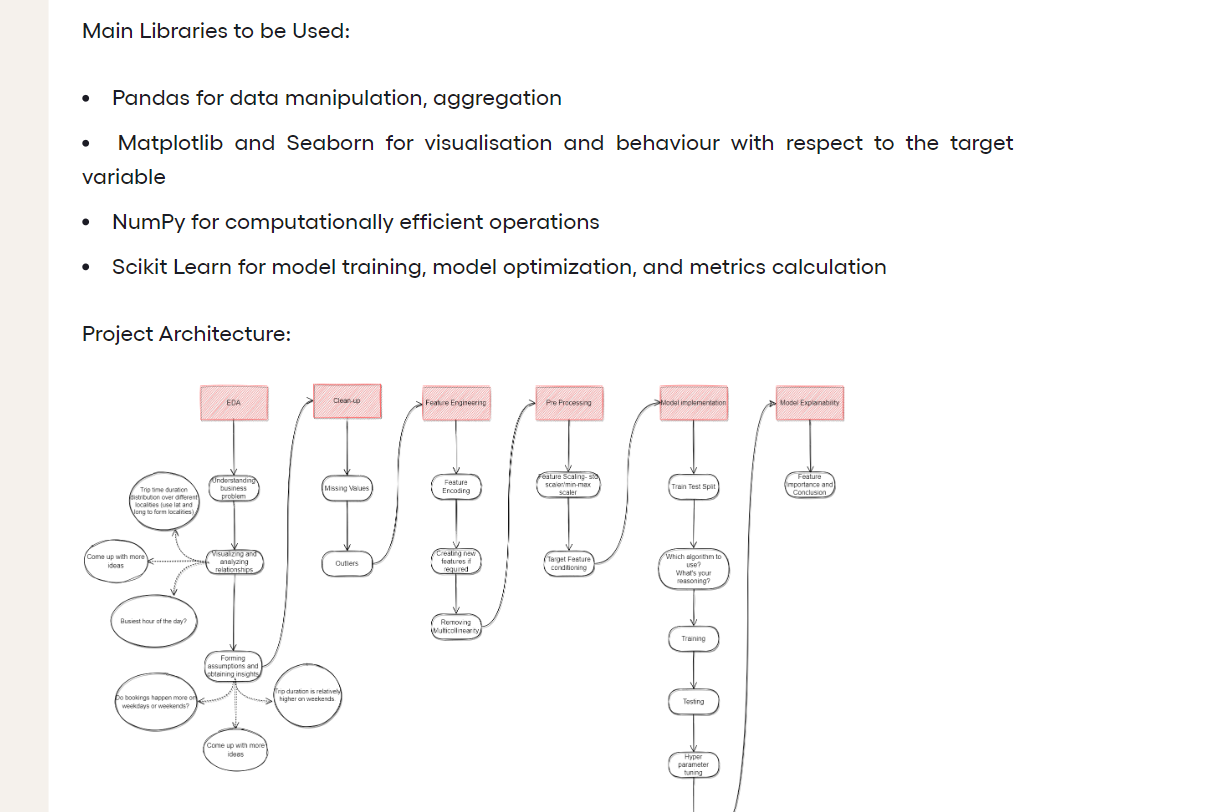

**Step-1 : Know The Data**

In [ ]:
#Install Library  use to calculate the haversine distance

!pip install haversine

<a id=library></a>
## Import libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id=data></a>
## Import Dataset

In [ ]:
#import the data from a csv file.
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Almabetter Matarial/ Almabetter/ module 1-/ Data/NYC Taxi Data.csv")

Dataset First View

In [ ]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

# Feature details:
id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Categorizing the features :

Let's divide features into categories:

Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

Time related: pickup_datetime, dropoff_datetime

Identifier: id(not useful for analysis)

Others: vendor_id, passenger_count, store_and_fwd_flag

Label details:
trip_duration - duration of the trip in seconds

### Feature details:
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
- Categorizing the features :

- Let's divide features into categories:

- Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

- Time related: pickup_datetime, dropoff_datetime

- Identifier: id(not useful for analysis)

- Others: vendor_id, passenger_count, store_and_fwd_flag


### Label details:
- trip_duration - duration of the trip in seconds




Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the counts
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 1458644
Number of columns: 11


In [ ]:
df.shape

(1458644, 11)

Dataset Information

In [ ]:
# Dataset Info
# Get information about the dataset
dataset_info = df.info()

# Print the dataset information
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


**Data Exploration**

In [ ]:
#checking data-types of variables to identify the numerical and categorical variables
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

Pasenger count varies from 0 to 9.
Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them

### Check Missing Values And NAN Values:

Prudent to inspect for absent values in our dataset, given potential modeling disruptions. In cases of missing values, respective rows must either be entirely eliminated, impacting dataset integrity, or values necessitate estimation for resolution.

In [ ]:
#Check for NaN values
df['trip_duration'].isnull().sum()

0

In [ ]:
#Check for duplicated values
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)



*   The dataset comprises approximately 1.5 million records.
*  Remarkably, the dataset is devoid of NaN or NULL entries, thereby obviating the need for any imputation process.




In [ ]:
#Calculating the frequency distribution of passenger counts in the DataFrame 'df'
passenger_count_freq = df['passenger_count'].value_counts().reset_index()

# 'passenger_count_freq' now holds a DataFrame with two columns: 'index' and 'passenger_count'
# The 'index' column represents the distinct passenger counts, and 'passenger_count' column indicates their respective occurrences

# Displaying the calculated frequency distribution
print(passenger_count_freq)

   index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1


In [ ]:
# Filtering the DataFrame 'df' to select records where 'passenger_count' is equal to 0
zero_passenger_count_records = df[df['passenger_count'] == 0]

# Counting the number of records with passenger count equal to 0
count_zero_passenger_records = zero_passenger_count_records.shape[0]

# Displaying the count of records with passenger count equal to 0
print("Number of records with passenger count equal to 0:", count_zero_passenger_records)


Number of records with passenger count equal to 0: 60


In [ ]:
# Filtering out records with passenger count equal to 0 from the DataFrame 'df'
df = df[df['passenger_count'] != 0]
print(df)

                id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.

In [ ]:
first_pickup_datetime = df["pickup_datetime"][0]
print("First pickup datetime:", first_pickup_datetime)

First pickup datetime: 2016-03-14 17:24:55


In [ ]:
# Converting timestamp columns to datetime format for detailed analysis
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Displaying the first few rows of the DataFrame after converting datetime columns
print("DataFrame with datetime columns converted:")
print(df.head())

DataFrame with datetime columns converted:
          id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N   


 ### Exploratory Data Analysis



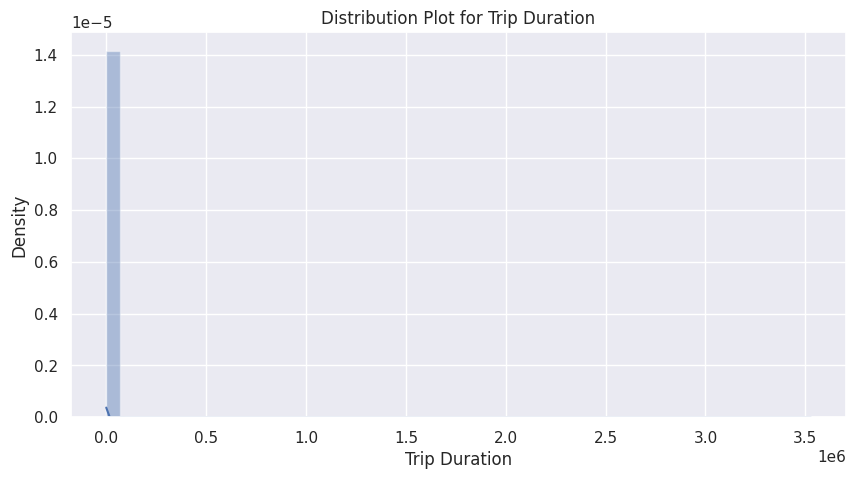

In [ ]:
# Creating a distribution plot for the dependent variable 'trip_duration'
plt.figure(figsize=(10, 5))
sns.distplot(df['trip_duration'], color="b")
plt.title('Distribution Plot for Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.show()

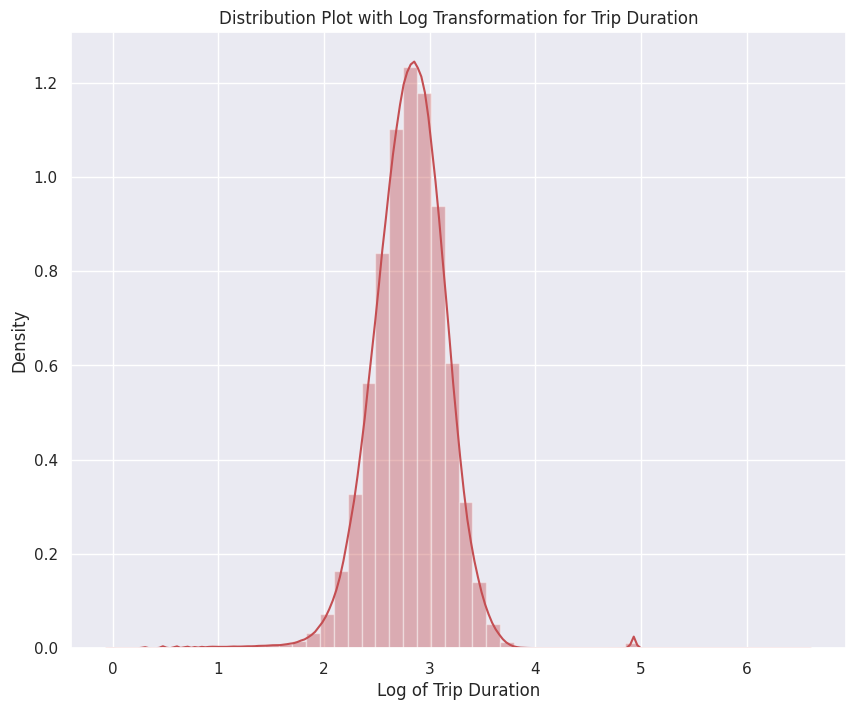

In [ ]:
# Applying a log transformation to the dependent variable 'trip_duration' and creating a distribution plot
plt.figure(figsize=(10, 8))
sns.distplot(np.log10(df['trip_duration']), color="r")
plt.title('Distribution Plot with Log Transformation for Trip Duration')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Density')
plt.show()

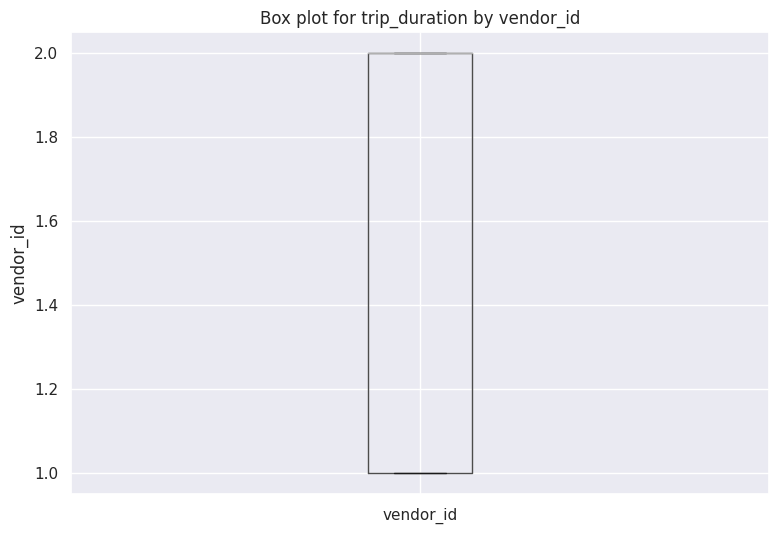

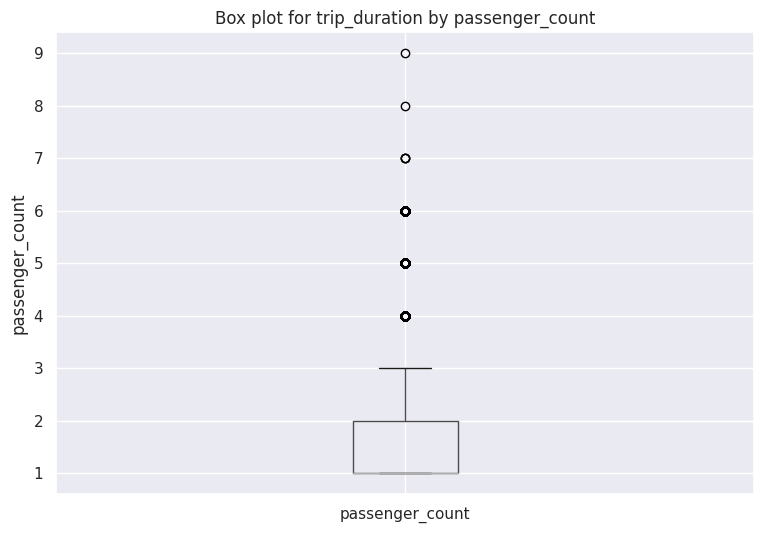

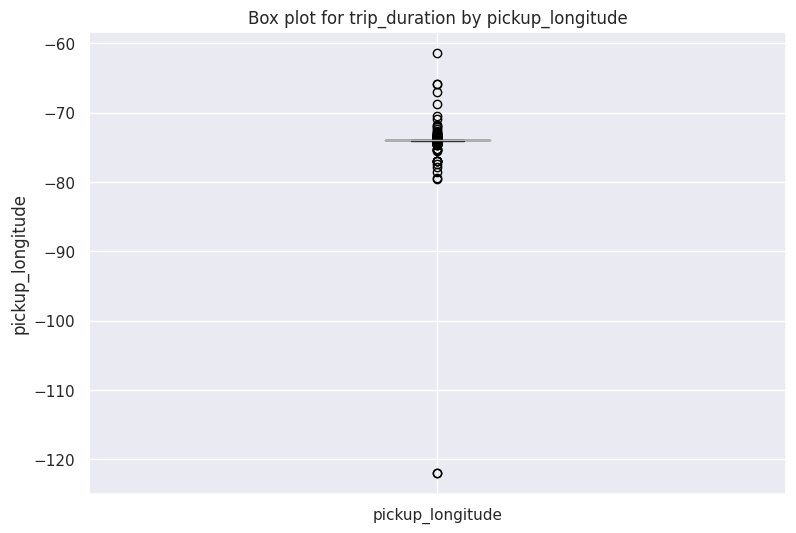

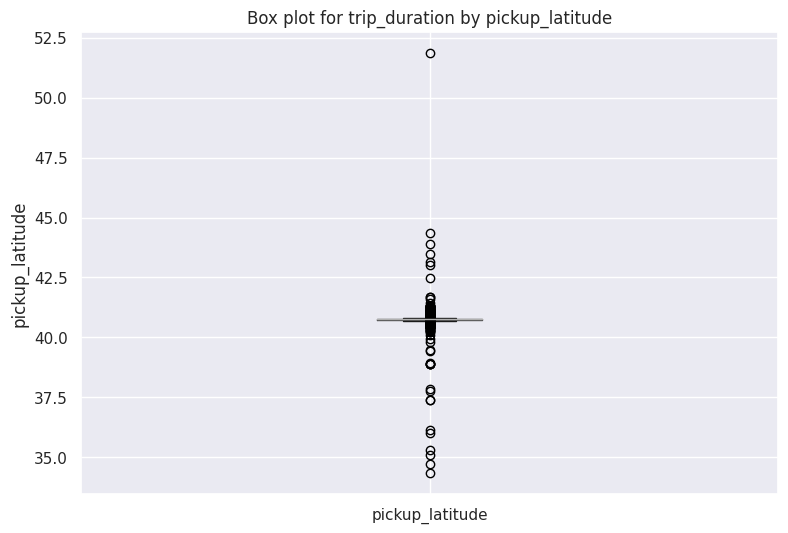

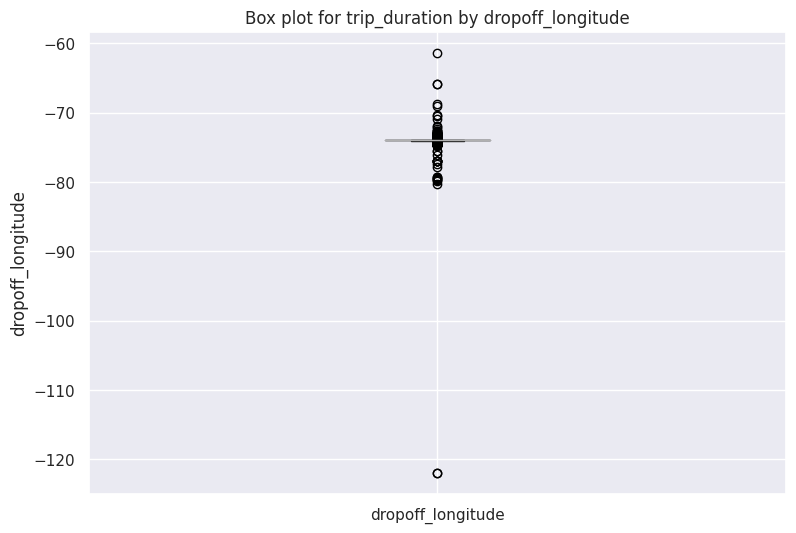

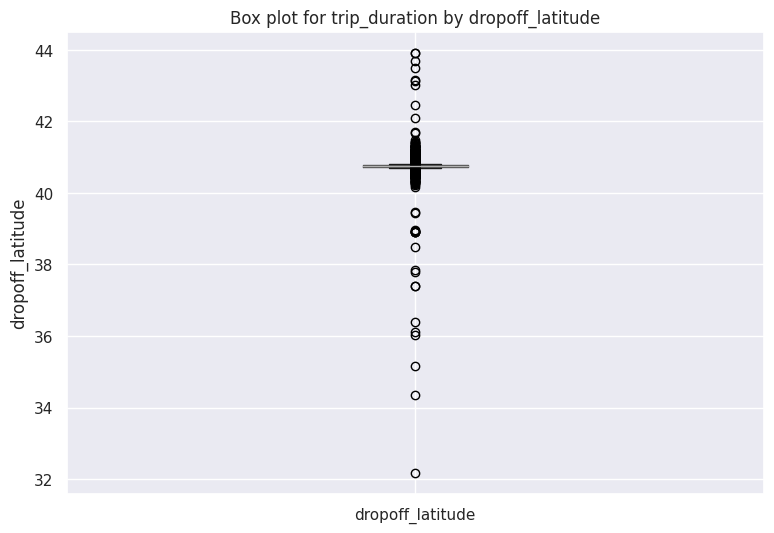

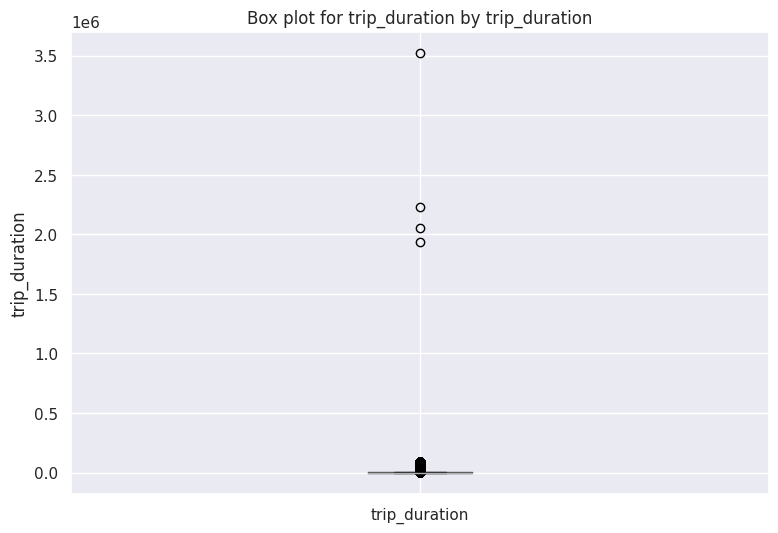

In [ ]:
# Plotting boxplots for the label 'trip_duration' by each numerical feature
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel(col)
    plt.title("Box plot for trip_duration by " + col)
    plt.show()

Vendor ID does not exhibit any outliers.

For passenger count, instances with 4 or more passengers are identified as outliers.

Outliers are evident in both pickup_longitude and pickup_latitude.

Similar to the pickup coordinates, dropoff_longitude and dropoff_latitude also have outliers.

The target variable, trip_duration, displays a substantial number of outliers.

Before addressing the outliers, let's assess the consistency of the feature "trip_duration".

Examining the box plot, we observe a limited number of instances with exceptionally large values, indicating potential outliers. Our subsequent action involves their removal. However, prior to this, it's imperative to ensure the consistency of the "trip_duration" feature. To achieve this, we calculate the time difference between the pickup and dropoff instances.

Verifying the Consistency of trip_duration:

Upon scrutinizing the box plot, it becomes evident that certain outliers possess remarkably high values within the trip_duration feature. Before addressing these outliers, it is imperative to establish the consistency of the said feature. To achieve this, an assessment is conducted by calculating the time difference between the pickup and dropoff instances. This analysis serves to confirm the validity of the recorded trip_duration values and ensures that any subsequent outlier removal is grounded in a solid foundation of data consistency.

In [ ]:
# Defining a function to calculate trip duration from pickup and dropoff times
def calculate_trip_duration(pickup, dropoff):
    return (dropoff - pickup).total_seconds()


In [ ]:
# Defining a function to calculate trip duration from pickup and dropoff times
def calculate_trip_duration(pickup, dropoff):
    return (dropoff - pickup).total_seconds()

# Creating a new feature 'calculated_trip_duration' by applying the defined function to each row
df['calculated_trip_duration'] = df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'], x['dropoff_datetime']), axis=1)


In [ ]:
# Checking for consistency by comparing trip duration with calculated trip duration
consistency_check = (df['calculated_trip_duration'] == df['trip_duration']).value_counts()

# Displaying the results of the consistency check
print("Consistency Check between Calculated and Recorded Trip Durations:")
print(consistency_check)

Consistency Check between Calculated and Recorded Trip Durations:
True    1458584
dtype: int64


In this instance, it is evident that the duration of the trip aligns consistently with the computed trip duration. As such, these significant values can be attributed solely to being outliers.

In [ ]:
# Dropping the previously created feature 'calculated_trip_duration'
df.drop(['calculated_trip_duration'], axis=1, inplace=True)

In order to identify outliers, we categorize our dependent variable into distinct groups based on trip duration: those lasting less than 1 minute, those within the range of 10 minutes, those within an hour, those within a day, those within two days, and those exceeding a two-day duration.

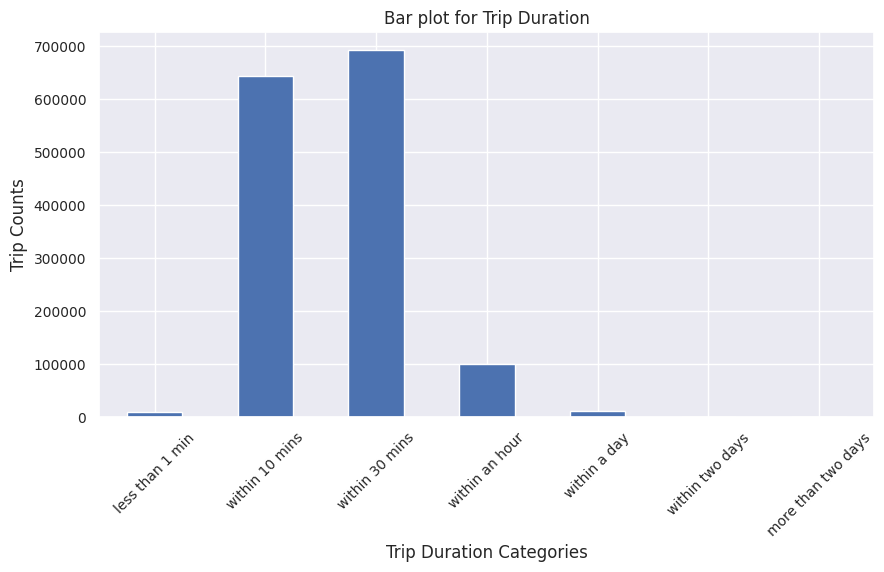

In [ ]:
# Creating categories for trip duration
bins = [0, 60, 600, 1800, 3600, 86400, 86400*2, 10000000]
labels = ['less than 1 min', 'within 10 mins', 'within 30 mins', 'within an hour', 'within a day', 'within two days', 'more than two days']

# Grouping and plotting trip counts by trip duration categories
plt.figure(figsize=[10, 5])
df.groupby(pd.cut(df['trip_duration'], bins=bins, labels=labels))['trip_duration'].count().plot(kind='bar', fontsize=10)
plt.title("Bar plot for Trip Duration")
plt.xlabel("Trip Duration Categories")
plt.ylabel("Trip Counts")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extracting numeric features from the DataFrame
numeric_features = df.describe().columns

# Displaying the list of numeric features
print("Numeric features:", numeric_features)

Numeric features: Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')


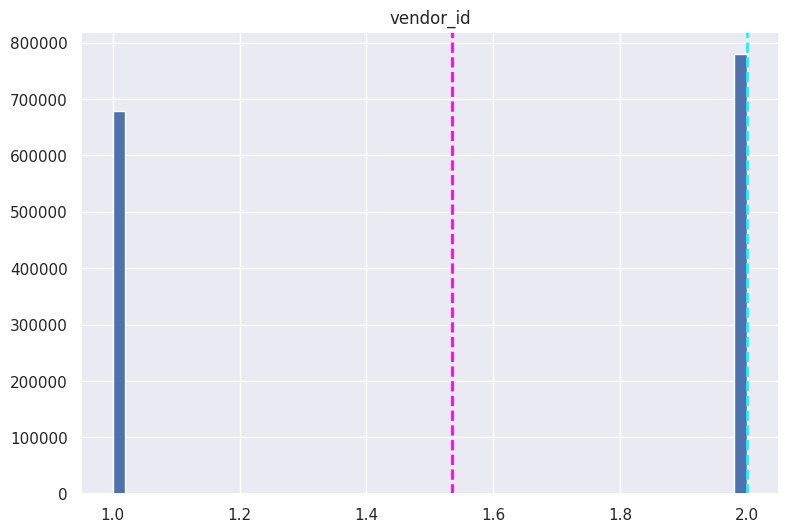

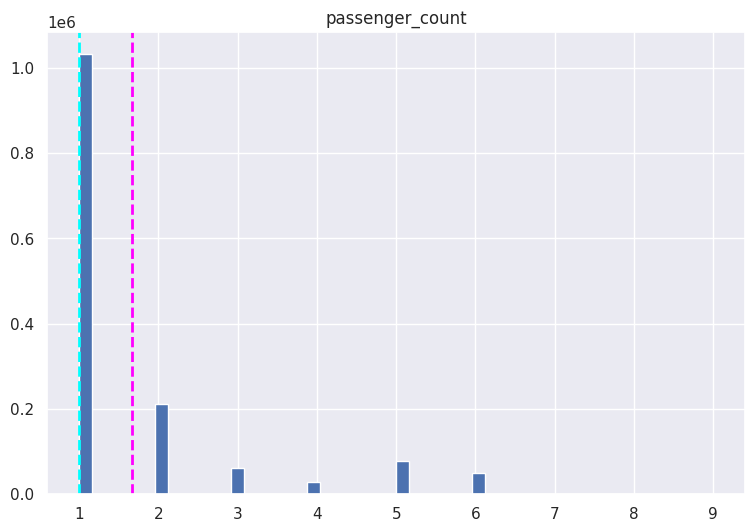

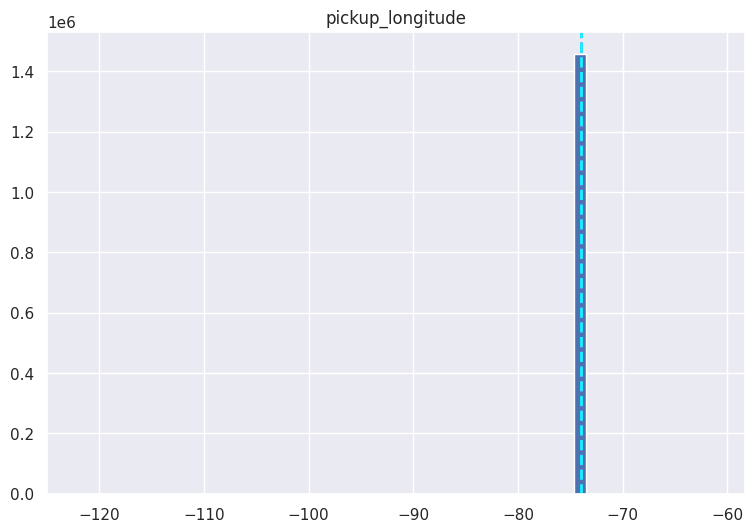

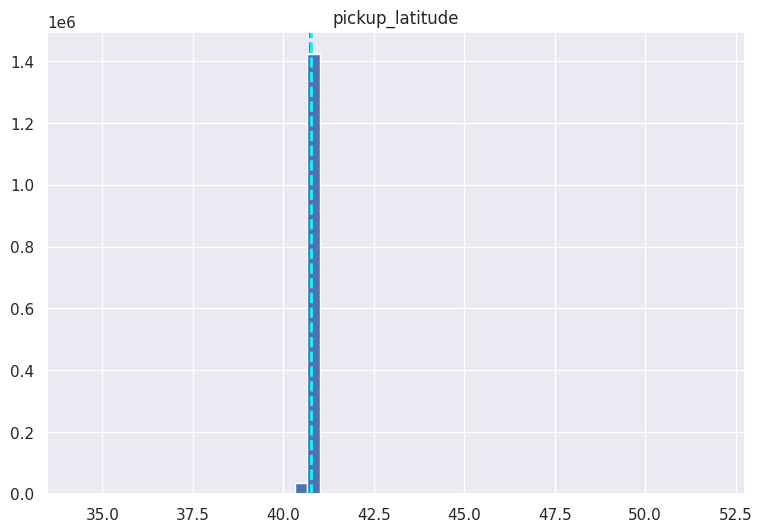

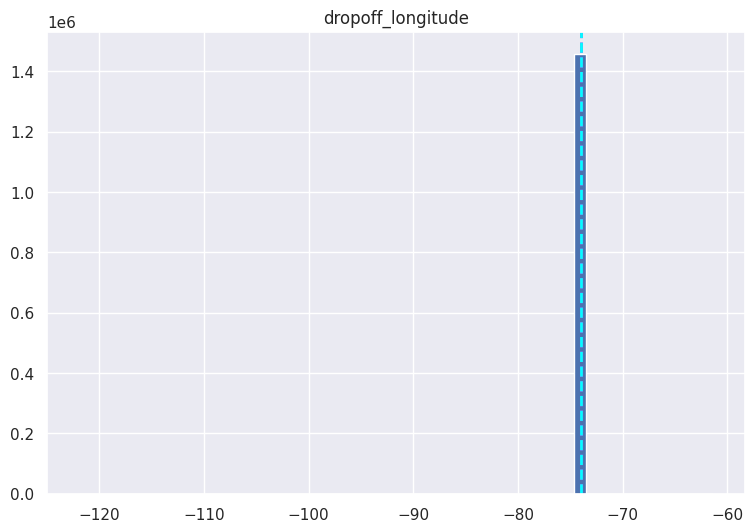

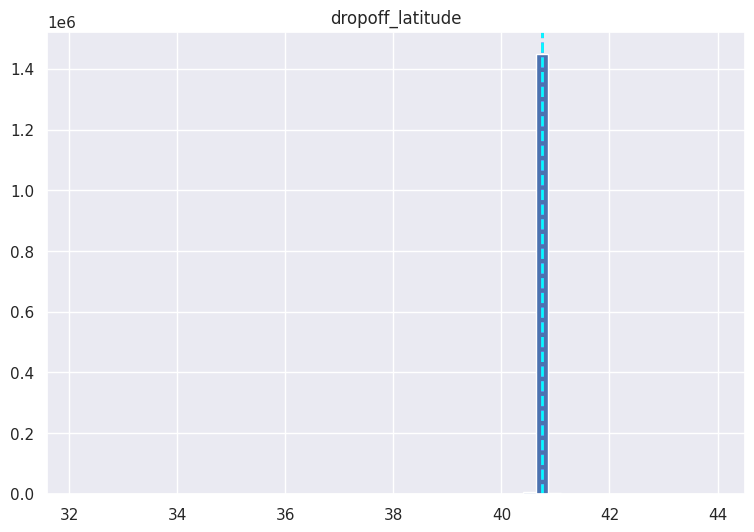

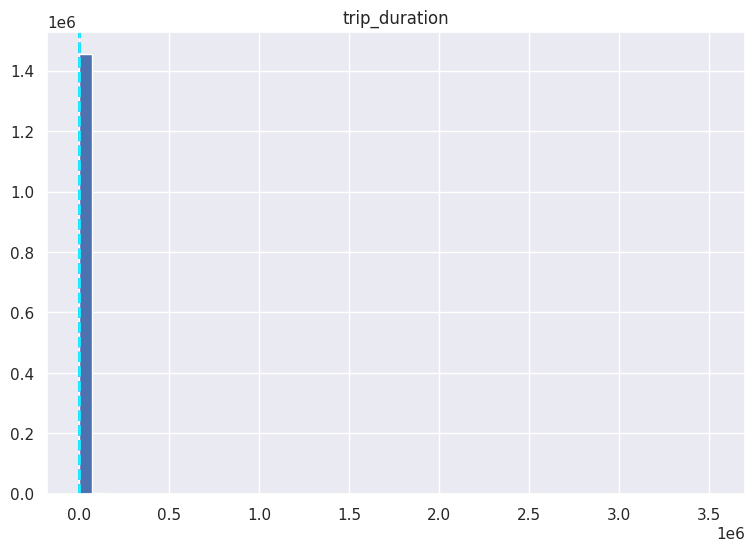

In [ ]:
# Plotting a histogram with mean and median lines for each numerical feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
    plt.show()

In [ ]:
df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

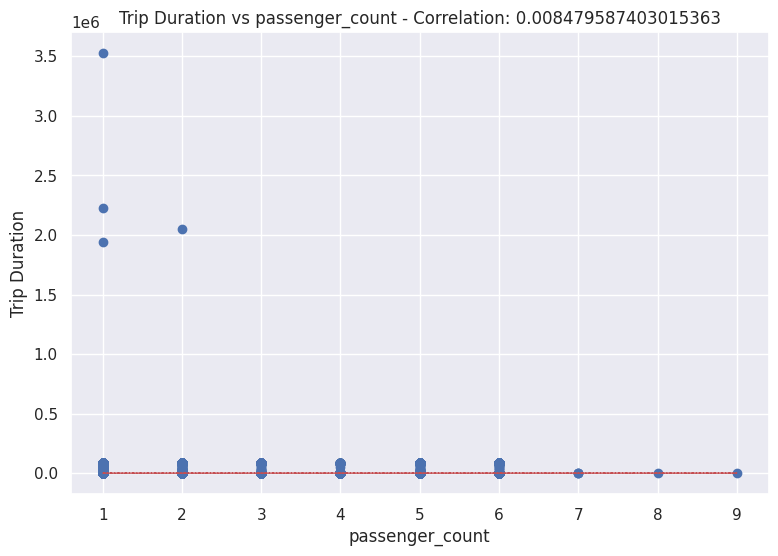

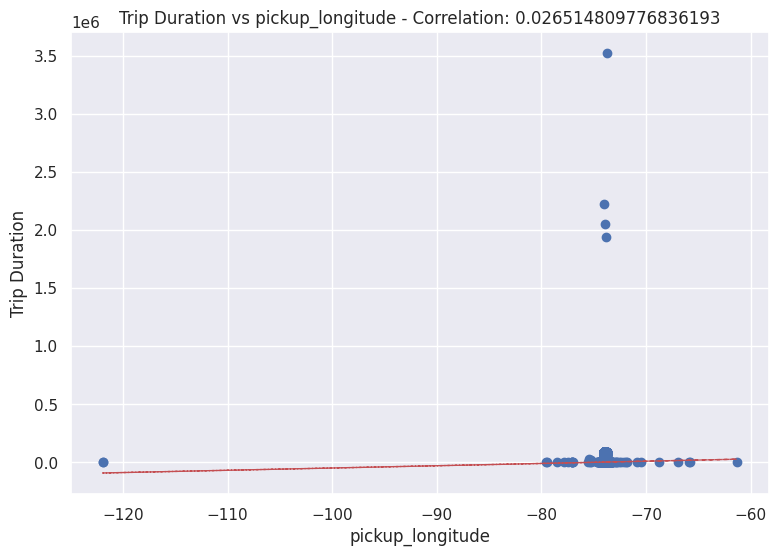

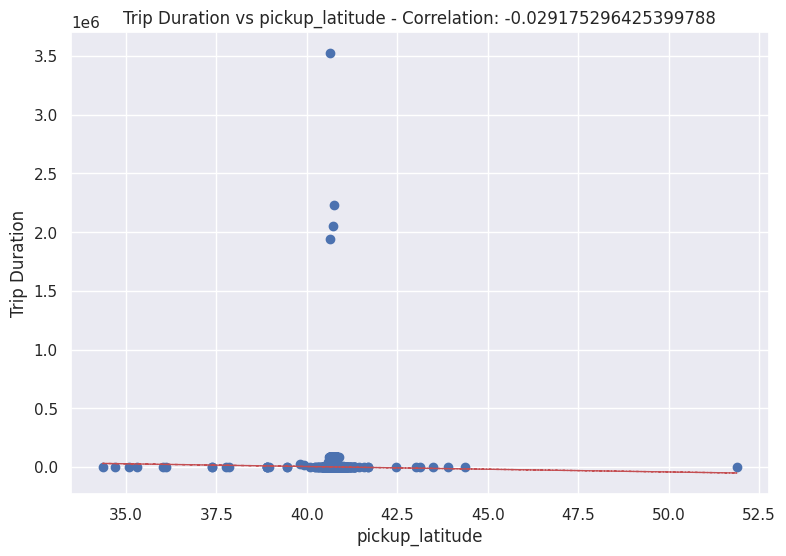

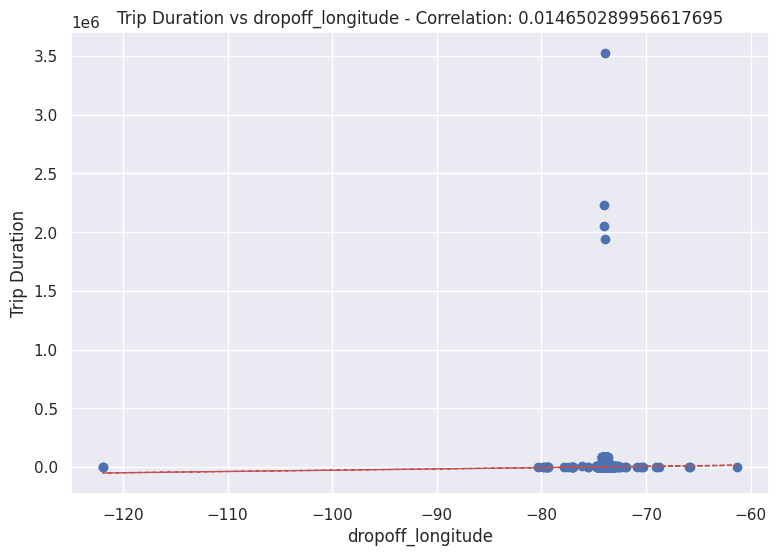

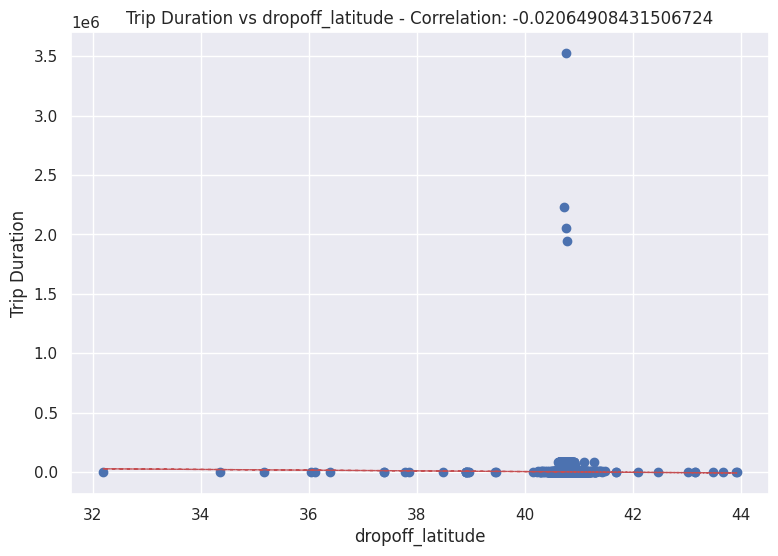

In [ ]:

# Plotting scatter plots and linear regression lines for each numerical feature against 'trip_duration'
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)

    # Scatter plot
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')

    # Adding linear regression line
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

    ax.set_title('Trip Duration vs ' + col + ' - Correlation: ' + str(correlation))
    plt.show()

<a id=map></a>
#Visualization through mapping techniques.
***
We will utilize map visualization to represent the geographical distribution of taxi pickup locations in the United States. By plotting latitude and longitude markers on the map, we aim to address the following inquiries:

Are all pickup points predominantly concentrated within the vicinity of New York City and its adjacent regions?

Are there any anomalous pickup locations that deviate from the norm?

Do the latitude and longitude coordinates remain within the geographical boundaries of the United States, excluding any locations beyond its territorial borders?

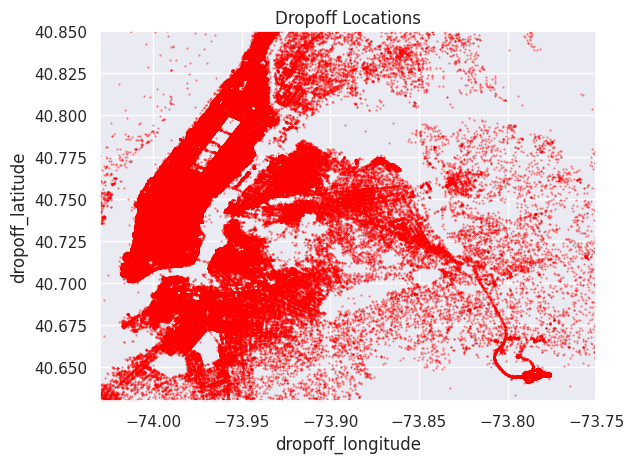

In [ ]:
# Defining city boundaries for visualization
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63, 40.85]

# Creating a scatter plot for dropoff locations
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
        color='red', s=0.2, alpha=0.6)

# Adding title and adjusting plot limits
plt.title('Dropoff Locations')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

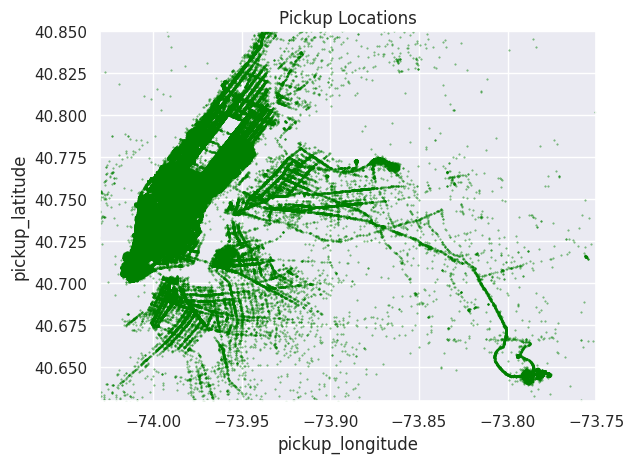

In [ ]:
# Defining city boundaries for visualization
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63, 40.85]

# Creating a scatter plot for pickup locations
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
        color='green', s=0.2, alpha=0.6)

# Adding title and adjusting plot limits
plt.title('Pickup Locations')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [ ]:
# Defining a function to select data points within a specified bounding box
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) &
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

# Defining a bounding box
BB = (-74.3, -73.0, 40.6, 41.7)


<a id=Folium></a>
## Folium
***

We will employ the Folium library to create interactive map visualizations that display the geographical distribution of taxi pickup locations across the United States. Through this tool, we aim to address the following inquiries:

Are all pickup points predominantly concentrated within the vicinity of New York City and its adjacent regions?

Are there any anomalous pickup locations that deviate from the norm?

Do the latitude and longitude coordinates remain within the geographical boundaries of the United States, excluding any locations beyond its territorial borders?


The framework known as Folium simplifies the process of visualizing data that has been processed in Python through interactive map representations using the Leaflet mapping library. This framework facilitates the integration of data onto a map for creating choropleth visualizations. Additionally, it allows for the inclusion of diverse forms of visualizations such as vector graphics, raster images, and HTML content, all presented as markers on the map interface.

In [ ]:
import folium

# Creating a map centered around New York City
nyc = folium.Map(location=[40.730610, -73.935242], zoom_start=12, control_scale=True)

# Displaying the map
nyc

In [ ]:
# Creating a map centered around New York City
nyc = folium.Map(location=[40.730610, -73.935242], zoom_start=12, control_scale=True)

# Adding markers for the first 100 pickup locations
for i in df.index[:100]:
    folium.Marker(location=[df['pickup_latitude'][i], df['pickup_longitude'][i]], icon=folium.Icon(color="blue")).add_to(nyc)

# Displaying the map with markers
nyc

In [ ]:
# Creating a map centered around New York City
nyc = folium.Map(location=[40.730610, -73.935242], zoom_start=12, control_scale=True)

# Adding markers for the first 100 dropoff locations
for i in df.index[:100]:
    folium.Marker(location=[df['dropoff_latitude'][i], df['dropoff_longitude'][i]], icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)

# Displaying the map with markers
nyc

 ### FEATURE ENGINEERING
Feature engineering is a strategic approach within machine learning that utilizes available data to generate novel variables not originally present in the training dataset. This technique is applicable to both supervised and unsupervised learning scenarios, with the objective of streamlining and expediting data preprocessing procedures, all while bolstering the precision of predictive models. By constructing these new attributes, the intention is to enrich the representation of the data, leading to improved model performance and more insightful outcomes.

In [ ]:
# Calculate and assign new columns for pickup day and dropoff day
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

# Display the updated DataFrame
df.head()


id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

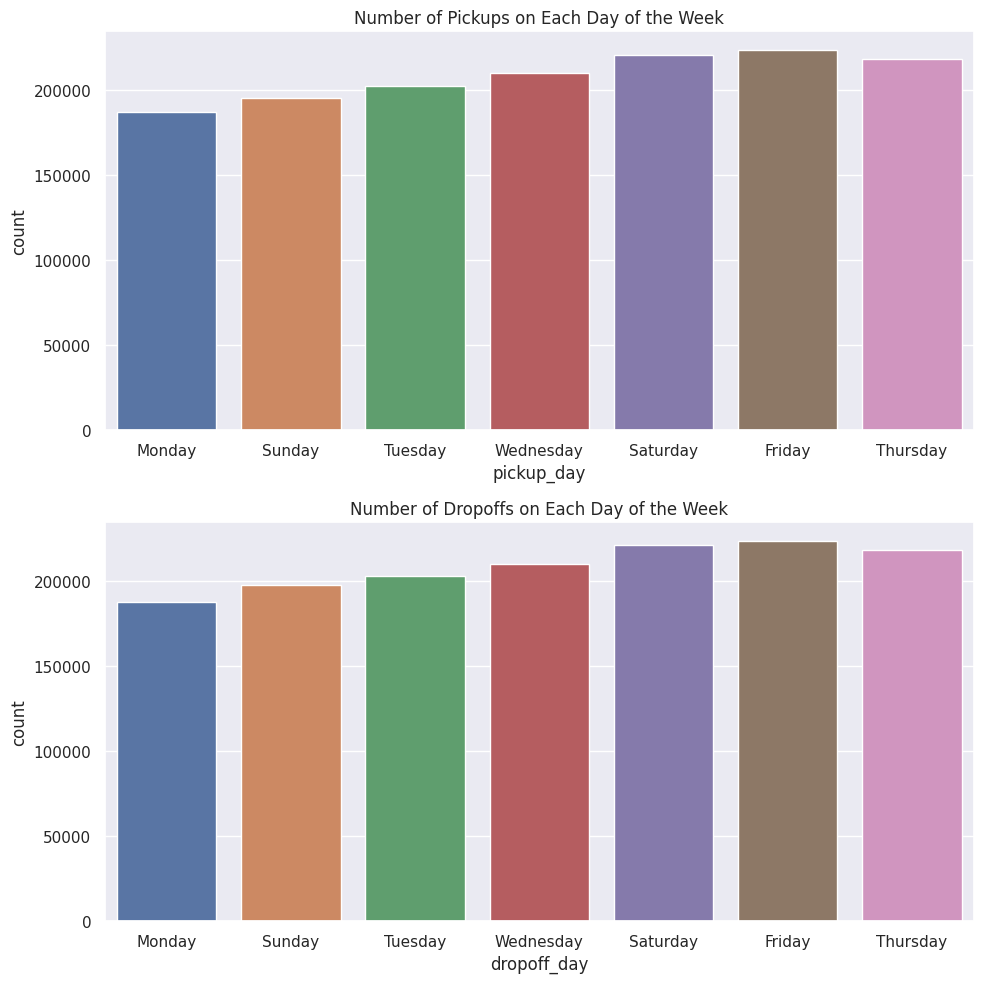

In [ ]:
# Creating a 2x1 grid of subplots
figure, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plotting the count of pickups on each day of the week
sns.countplot(x='pickup_day', data=df, ax=ax[0])
ax[0].set_title('Number of Pickups on Each Day of the Week')

# Plotting the count of dropoffs on each day of the week
sns.countplot(x='dropoff_day', data=df, ax=ax[1])
ax[1].set_title('Number of Dropoffs on Each Day of the Week')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()

Consequently, it is apparent that a majority of trips occurred on Fridays, whereas Mondays exhibited the lowest trip frequency. It is also pertinent to delve into the examination of the relationship between trip duration and the days of the week, as this distribution pattern warrants further investigation.

In [ ]:
# Defining the bins for categorizing trip durations
bins = np.array([0, 1800, 3600, 5400, 7200, 90000])

# Categorizing trip durations and assigning labels
df['duration_time'] = pd.cut(df['trip_duration'], bins, labels=["< 5", "5-10", "10-15", "15-20", ">20"])

In [ ]:

import datetime

# Defining the timezone categorization function
def timezone(x):
    if x >= datetime.time(4, 0, 1) and x <= datetime.time(10, 0, 0):
        return 'morning'
    elif x >= datetime.time(10, 0, 1) and x <= datetime.time(16, 0, 0):
        return 'midday'
    elif x >= datetime.time(16, 0, 1) and x <= datetime.time(22, 0, 0):
        return 'evening'
    elif x >= datetime.time(22, 0, 1) or x <= datetime.time(4, 0, 0):
        return 'late night'

# Creating new columns 'pickup_timezone' and 'dropoff_timezone'
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
df['dropoff_timezone'] =df['dropoff_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))


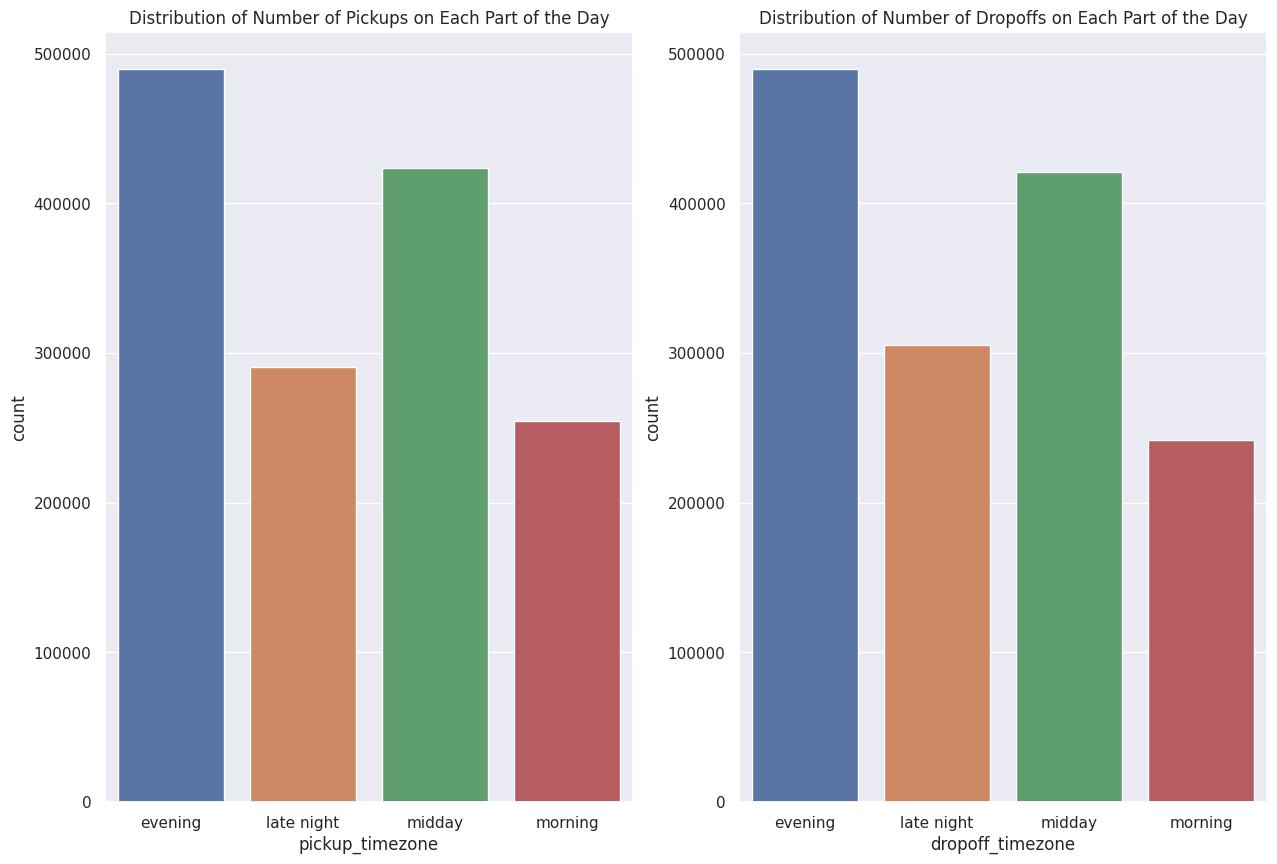

In [ ]:
# Creating a 1x2 grid of subplots
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plotting the distribution of number of pickups on each part of the day
sns.countplot(x='pickup_timezone', data=df, ax=ax[0])
ax[0].set_title('Distribution of Number of Pickups on Each Part of the Day')

# Plotting the distribution of number of dropoffs on each part of the day
sns.countplot(x='dropoff_timezone', data=df, ax=ax[1])
ax[1].set_title('Distribution of Number of Dropoffs on Each Part of the Day')

# Displaying the plots
plt.show()

In [ ]:
import math

# Define the Haversine formula function
def haversine(coord1, coord2):
    # Radius of the Earth in kilometers
    radius = 6371.0

    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # Difference in coordinates
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    # Haversine formula calculation
    a = math.sin(dlat / 2.0)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2.0)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    return distance

# Define the calc_distance function using Haversine formula
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
# Calculate distance and assign new column to the DataFrame
df["distance"] = df.apply(lambda x: calc_distance(x), axis=1)


### Outlier Detection using IQR Method

The interquartile range (IQR) is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset.

The lower limit for outlier detection is determined by subtracting 1.5 times the IQR from Q1.

The upper limit for outlier detection is calculated by adding 1.5 times the IQR to Q3.

To address outliers in the distance variable, one must retain values falling above the lower limit outlier threshold and below the upper limit outlier threshold. These steps will involve the removal of outliers from the distance data.

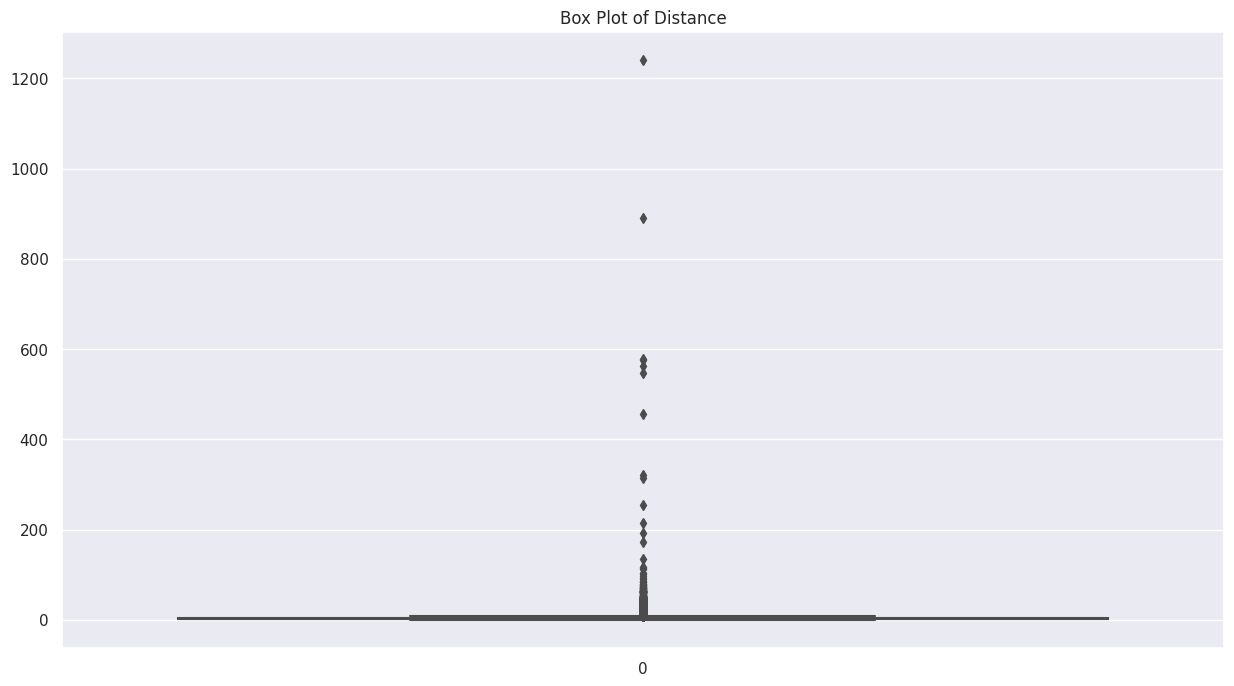

In [ ]:

# Creating a box plot of the distance distribution
plt.figure(figsize=(15, 8))
plt.title("Box Plot of Distance")
ax = sns.boxplot(data=df['distance'], orient="v")

# Display the plot
plt.show()

In [ ]:

# Calculate and print the 25th percentile (Q1)
percentile_q1 = np.percentile(df['distance'], 25)
print("25th Percentile (Q1):", percentile_q1)

# Calculate and print the 50th percentile (median)
percentile_q2 = np.percentile(df['distance'], 50)
print("50th Percentile (Median):", percentile_q2)

# Calculate and print the 75th percentile (Q3)
percentile_q3 = np.percentile(df['distance'], 75)
print("75th Percentile (Q3):", percentile_q3)

25th Percentile (Q1): 1.2319091369140616
50th Percentile (Median): 2.093781952668662
75th Percentile (Q3): 3.8754450930297395


In [ ]:
# Calculate IQR, lower limit, and upper limit for outliers
iqr = percentile_q3 - percentile_q1
lower_limit_outlier = percentile_q1 - 1.5 * iqr
upper_limit_outlier = percentile_q3 + 1.5 * iqr

# Print the calculated limits
print("Lower Limit for Outliers:", lower_limit_outlier)
print("Upper Limit for Outliers:", upper_limit_outlier)

Lower Limit for Outliers: -2.7333947972594554
Upper Limit for Outliers: 7.840749027203257


In [ ]:
# Filter the DataFrame to remove rows with distances outside outlier limits
df = df[(df['distance'] > lower_limit_outlier) & (df['distance'] < upper_limit_outlier)]


In [ ]:
df.shape

(1317917, 17)

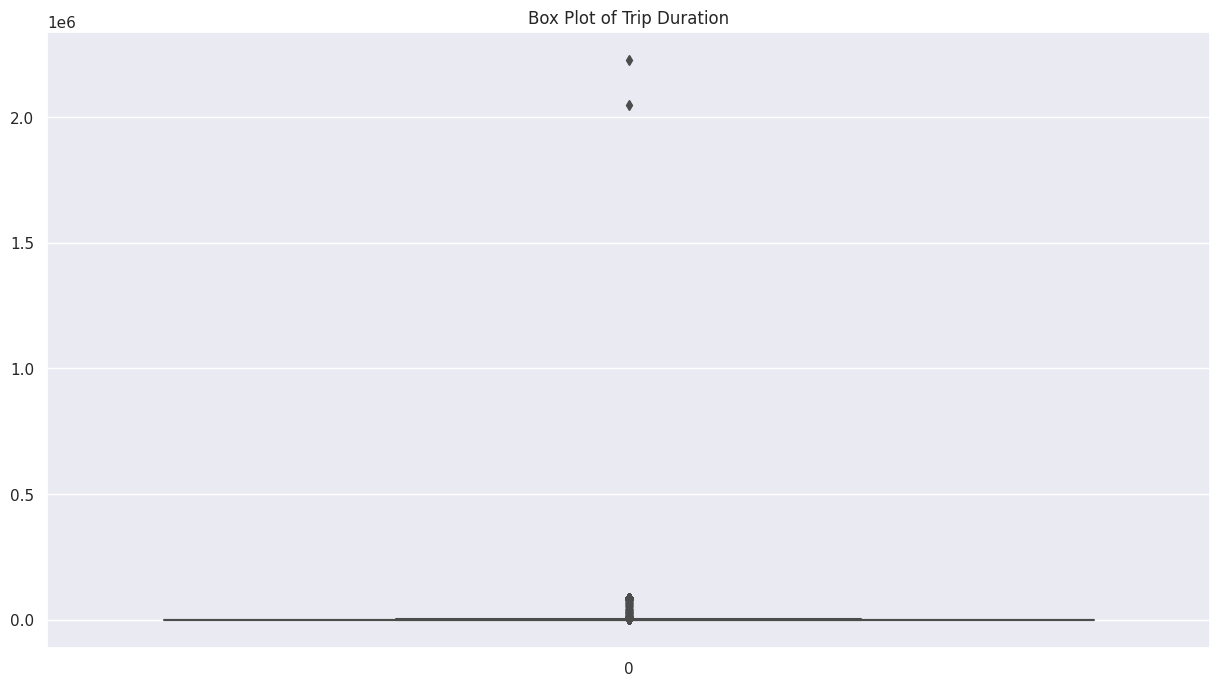

In [ ]:
# Creating a box plot of the trip duration distribution
plt.figure(figsize=(15, 8))
plt.title("Box Plot of Trip Duration")
ax = sns.boxplot(data=df['trip_duration'], orient="v")

# Display the plot
plt.show()

In [ ]:

# Calculate and print the 25th percentile (Q1) of trip duration
percentile_q1_trip_duration = np.percentile(df['trip_duration'], 25)
print("25th Percentile (Q1) of Trip Duration:", percentile_q1_trip_duration)

# Calculate and print the 50th percentile (median) of trip duration
percentile_q2_trip_duration = np.percentile(df['trip_duration'], 50)
print("50th Percentile (Median) of Trip Duration:", percentile_q2_trip_duration)

# Calculate and print the 75th percentile (Q3) of trip duration
percentile_q3_trip_duration = np.percentile(df['trip_duration'], 75)
print("75th Percentile (Q3) of Trip Duration:", percentile_q3_trip_duration)


25th Percentile (Q1) of Trip Duration: 373.0
50th Percentile (Median) of Trip Duration: 605.0
75th Percentile (Q3) of Trip Duration: 931.0


In [ ]:
# Calculate IQR, lower limit, and upper limit for outliers of trip duration
iqr_trip_duration = percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration = percentile_q1_trip_duration - 1.5 * iqr_trip_duration
upper_limit_outlier_trip_duration = percentile_q3_trip_duration + 1.5 * iqr_trip_duration

# Print the calculated limits for trip duration
print("Lower Limit for Outliers of Trip Duration:", lower_limit_outlier_trip_duration)
print("Upper Limit for Outliers of Trip Duration:", upper_limit_outlier_trip_duration)


Lower Limit for Outliers of Trip Duration: -464.0
Upper Limit for Outliers of Trip Duration: 1768.0


In [ ]:

# Filter the DataFrame to remove rows with trip duration values outside outlier limits
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < upper_limit_outlier_trip_duration)]


In [ ]:
df.shape

(1277345, 17)

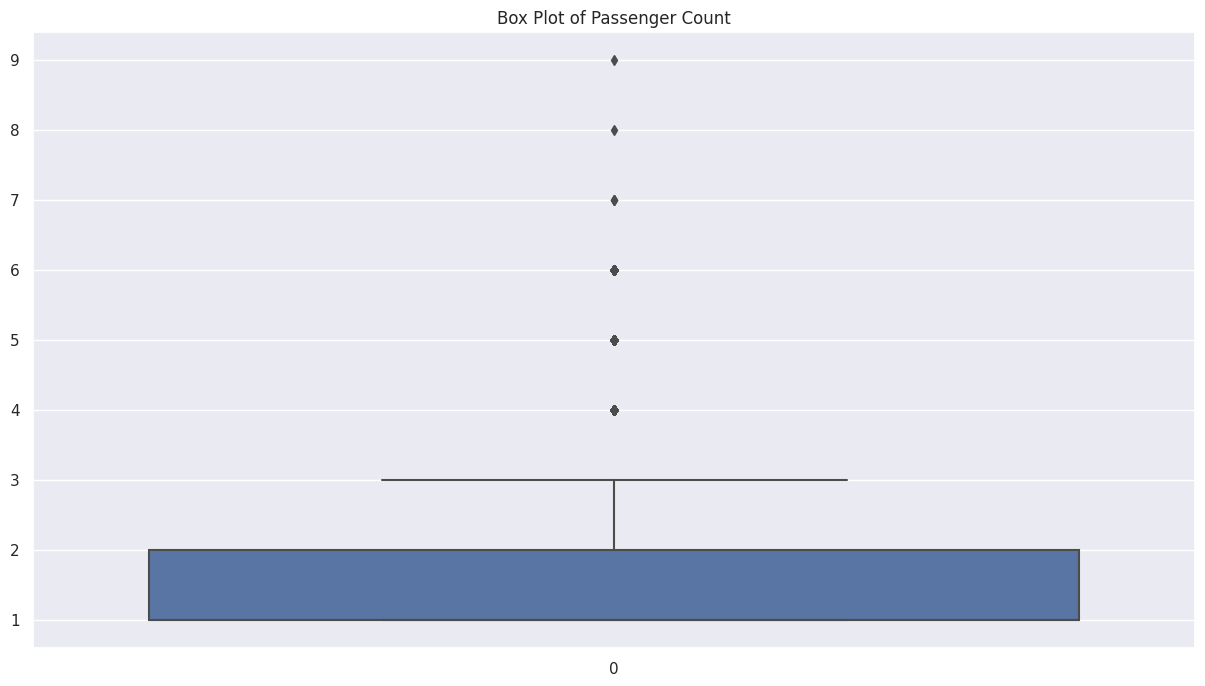

In [ ]:
# Creating a box plot of the passenger count distribution
plt.figure(figsize=(15, 8))
plt.title("Box Plot of Passenger Count")
ax = sns.boxplot(data=df['passenger_count'])

# Display the plot
plt.show()

In [ ]:

# Calculate and print the 25th percentile (Q1) of passenger count
percentile_q1_passenger_count = np.percentile(df['passenger_count'], 25)
print("25th Percentile (Q1) of Passenger Count:", percentile_q1_passenger_count)

# Calculate and print the 50th percentile (median) of passenger count
percentile_q2_passenger_count = np.percentile(df['passenger_count'], 50)
print("50th Percentile (Median) of Passenger Count:", percentile_q2_passenger_count)

# Calculate and print the 75th percentile (Q3) of passenger count
percentile_q3_passenger_count = np.percentile(df['passenger_count'], 75)
print("75th Percentile (Q3) of Passenger Count:", percentile_q3_passenger_count)


25th Percentile (Q1) of Passenger Count: 1.0
50th Percentile (Median) of Passenger Count: 1.0
75th Percentile (Q3) of Passenger Count: 2.0


In [ ]:
# Calculate IQR, lower limit, and upper limit for outliers of passenger count
iqr_passenger_count = percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count = percentile_q1_passenger_count - 1.5 * iqr_passenger_count
upper_limit_outlier_passenger_count = percentile_q3_passenger_count + 1.5 * iqr_passenger_count

# Print the calculated limits for passenger count
print("Lower Limit for Outliers of Passenger Count:", lower_limit_outlier_passenger_count)
print("Upper Limit for Outliers of Passenger Count:", upper_limit_outlier_passenger_count)


Lower Limit for Outliers of Passenger Count: -0.5
Upper Limit for Outliers of Passenger Count: 3.5


In [ ]:
# Filter the DataFrame to remove rows with passenger count values outside outlier limits
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < upper_limit_outlier_passenger_count)]


In [ ]:
df.shape

(1142605, 17)

In [ ]:

# Convert the "pickup_datetime" column to datetime format with the specified format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")


In [ ]:

# Convert the 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Add a new column 'Day' to the DataFrame, containing the day names
df['Day'] = df['pickup_datetime'].dt.day_name()

# Now the DataFrame 'df' has a new column 'Day' with the day names


In [ ]:

# Convert the 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Calculate and assign new columns to gain more insights from the data

# Add a new column 'year' to the DataFrame, containing the year value
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)

# Add a new column 'month' to the DataFrame, containing the month value
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)

# Add a new column 'day_num' to the DataFrame, containing the day of the month value
df['day_num'] = df['pickup_datetime'].apply(lambda x: x.day)

# Add a new column 'hour' to the DataFrame, containing the hour value
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)

# Add a new column 'minute' to the DataFrame, containing the minute value
df['minute'] = df['pickup_datetime'].apply(lambda x: x.minute)

# Add a new column 'Day' to the DataFrame, containing the day names
df['Day'] = df['pickup_datetime'].dt.day_name()

# Now the DataFrame 'df' has new columns 'year', 'month', 'day_num', 'hour', 'minute', and 'Day'
# that provide more detailed time-related insights from the 'pickup_datetime' column


In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
7  id1324603          2 2016-05-21 07:54:58 2016-05-21 08:20:49   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude store_and_fwd_flag  ...  duration_time pickup_timezone  \
0         40.765602                  N  ...            < 5         evening   
1         40.731152                  N  ...            < 5      late night   
3         40.706718                  N  ...            < 5         evening   
4         40.782520                  N  ...            < 5          midday   
7         40.760559                  N  ...            < 5         morning   

  dropoff_timezone  distance        Day  year  month day_num  hour  minute  
0          evening  1.498521     Monday  2016      3      14    17      24  
1       late night  1.805507     Sunday  2016      6      12     0      43  
3          evening  1.485498  Wednesday  2016      4       6    19      32  
4           midday  1.188588   Saturday  2016      3      26    13      30  
7          morning  5.714981   Saturday  2016      5      21     7      54  

[5 rows x 23 columns]

Converting the trip duration into hours facilitates a more consistent time unit for analysis.

Applying the logarithm to the distance variable serves the purpose of normalizing the data, aiding in achieving a balanced distribution.

Similarly, applying the logarithm to the trip duration variable also serves the purpose of normalizing its data, promoting a more uniform distribution for analysis.







In [ ]:

# Calculate and assign new columns to gain more insights from the data

# Add a new column 'trip_duration_hour' to the DataFrame, containing trip duration in hours
df['trip_duration_hour'] = df['trip_duration'] / 3600

# Calculate the natural logarithm of the 'distance' column and add it as a new column 'log_distance'
df['log_distance'] = np.log(df['distance'])

# Calculate the natural logarithm of the 'trip_duration_hour' column and add it as a new column 'log_trip_duration'
df['log_trip_duration'] = np.log(df['trip_duration_hour'])

# Now the DataFrame 'df' has new columns 'trip_duration_hour', 'log_distance', and 'log_trip_duration'
# that provide additional insights derived from existing columns


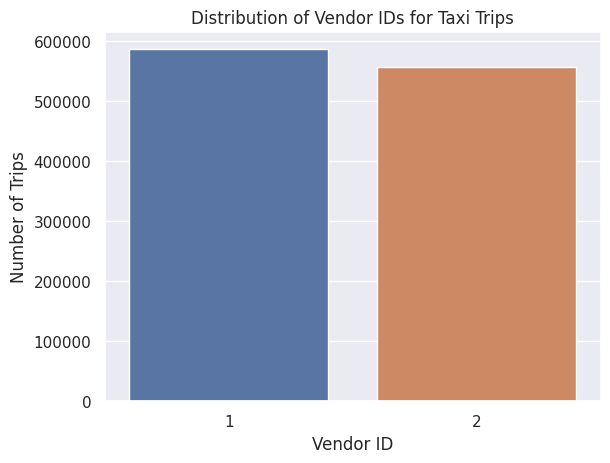

In [ ]:
# Create a count plot to visualize the distribution of vendor IDs
sns.countplot(x='vendor_id', data=df)

# Add labels and a title to the plot
plt.xlabel('Vendor ID')
plt.ylabel('Number of Trips')
plt.title('Distribution of Vendor IDs for Taxi Trips')

# Display the plot
plt.show()

While both vendors exhibit nearly equal market shares, it is evident from the provided graph that Vendor 1 enjoys greater popularity among the populace.

<a id=flag></a>
## Store_and_fwd_flag
***
The "Store_and_fwd_flag" is a binary indicator that provides information regarding the treatment of a trip record in cases where the vehicle lacked a connection to the server. Specifically, when the flag is set to "Y," it signifies that the trip record was held in the vehicle's memory for later transmission (store and forward) to the vendor once a network connection was established. Conversely, when the flag is set to "N," it indicates that the trip was not subject to such storage and forwarding treatment.

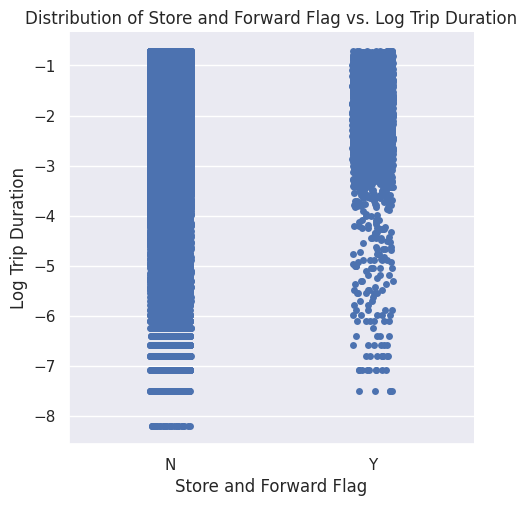

In [ ]:

# Create a strip plot to visualize the distribution of store_and_fwd_flag vs. log_trip_duration
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration", kind="strip", data=df)

# Add labels and a title to the plot
plt.xlabel('Store and Forward Flag')
plt.ylabel('Log Trip Duration')
plt.title('Distribution of Store and Forward Flag vs. Log Trip Duration')

# Display the plot
plt.show()


### Observations:

The aforementioned outcome highlights that approximately 1% of the trip data underwent initial storage within the vehicle prior to being transmitted to the server. This occurrence could be attributed to various factors, including:
Instances where trips extended beyond local areas, lacking stable network connectivity upon completion.
Brief interruptions in signal reception as trips concluded.
Irregularities in signal strength experienced throughout the trip's duration.
The possibility of GPS or mobile device battery depletion at the conclusion of the trip.


<a id=bivariate></a>
# Bivariate Analysis
***
Bivariate analysis is a method employed to ascertain the presence of a potential relationship between two distinct sets of values. This analytical approach typically involves the examination of two variables, denoted as X and Y, to determine whether any correlation or connection exists between them.


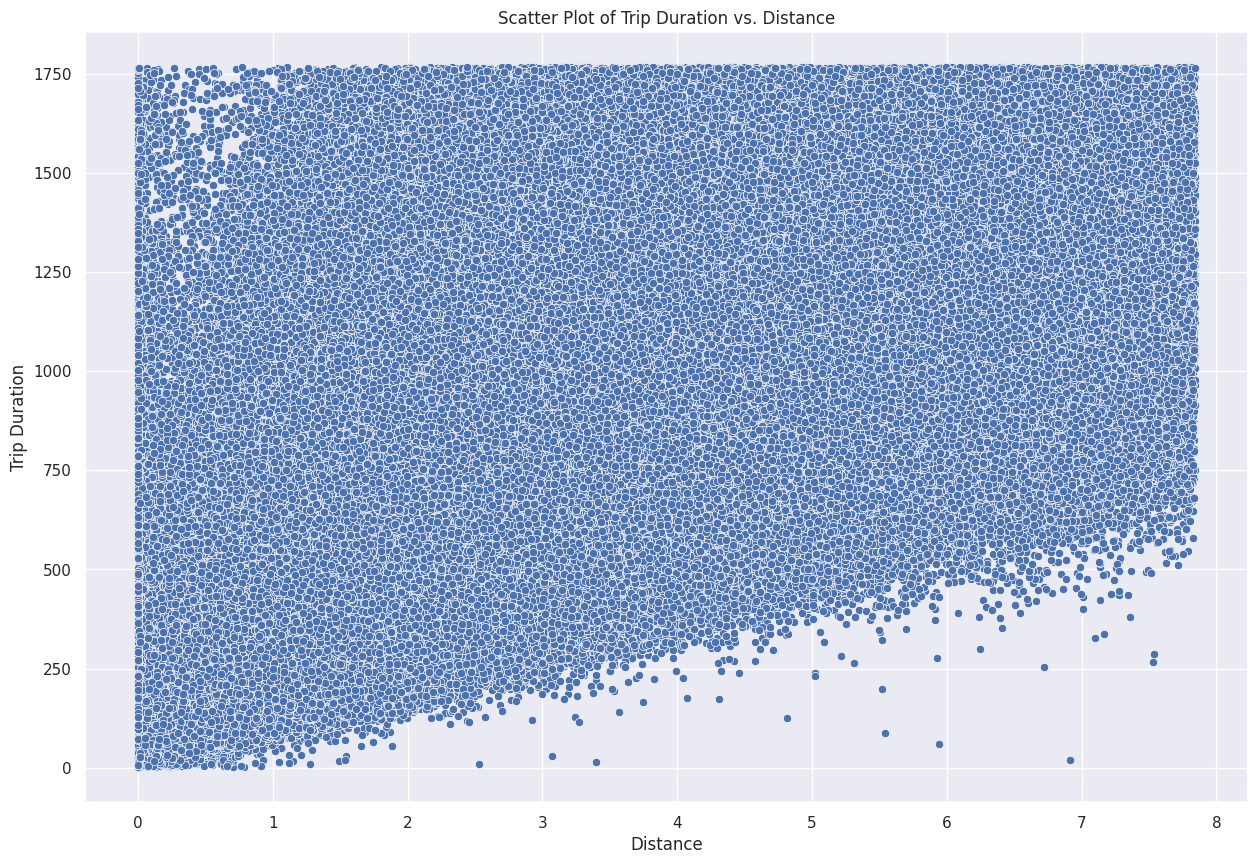

In [ ]:
# Create a new figure for the scatter plot with a specific size
fig = plt.figure(figsize=(15, 10))

# Create a scatter plot to visualize the relationship between distance and trip duration
sns.scatterplot(x='distance', y='trip_duration', data=df)

# Add labels and a title to the plot
plt.xlabel('Distance')
plt.ylabel('Trip Duration')
plt.title('Scatter Plot of Trip Duration vs. Distance')

# Display the plot
plt.show()

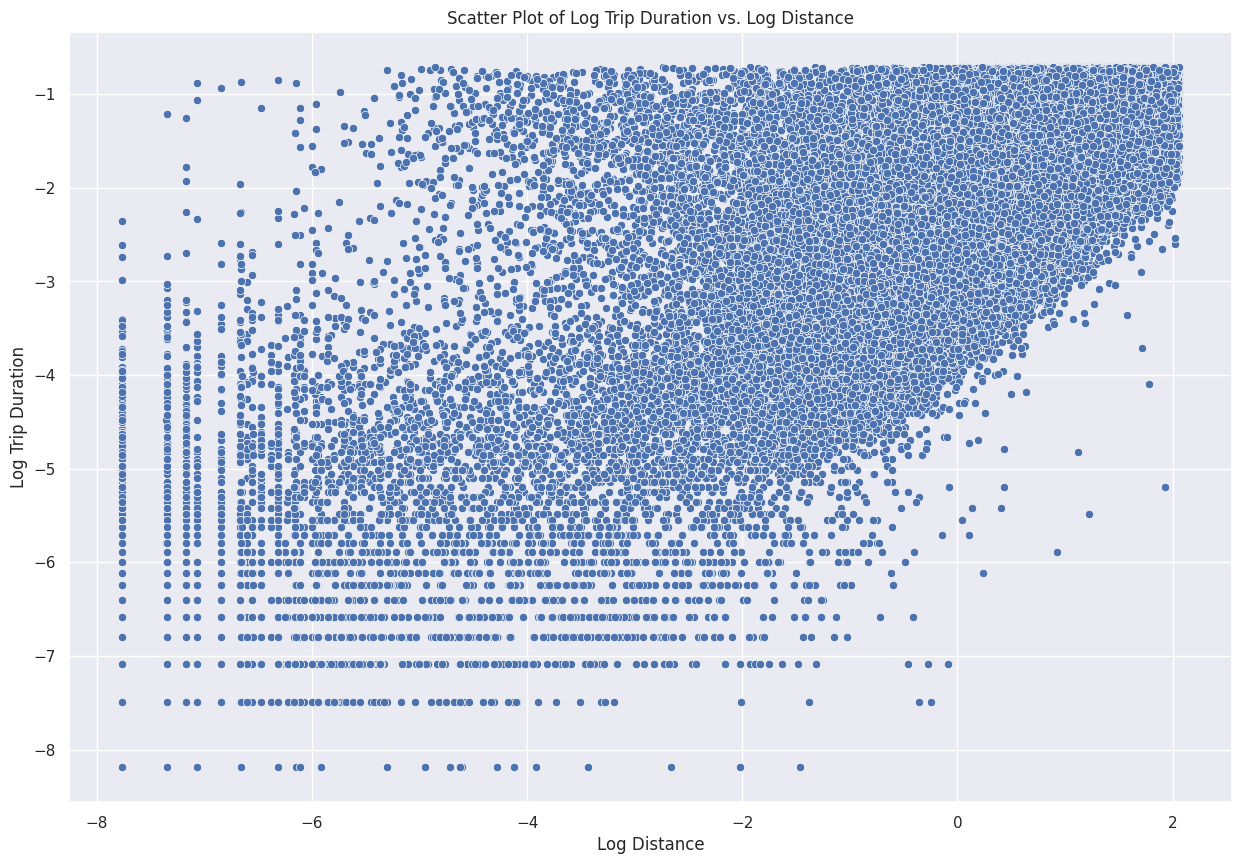

In [ ]:
# Create a new figure for the scatter plot with a specific size
fig = plt.figure(figsize=(15, 10))

# Create a scatter plot to visualize the relationship between log_distance and log_trip_duration
sns.scatterplot(x='log_distance', y='log_trip_duration', data=df)

# Add labels and a title to the plot
plt.xlabel('Log Distance')
plt.ylabel('Log Trip Duration')
plt.title('Scatter Plot of Log Trip Duration vs. Log Distance')

# Display the plot
plt.show()

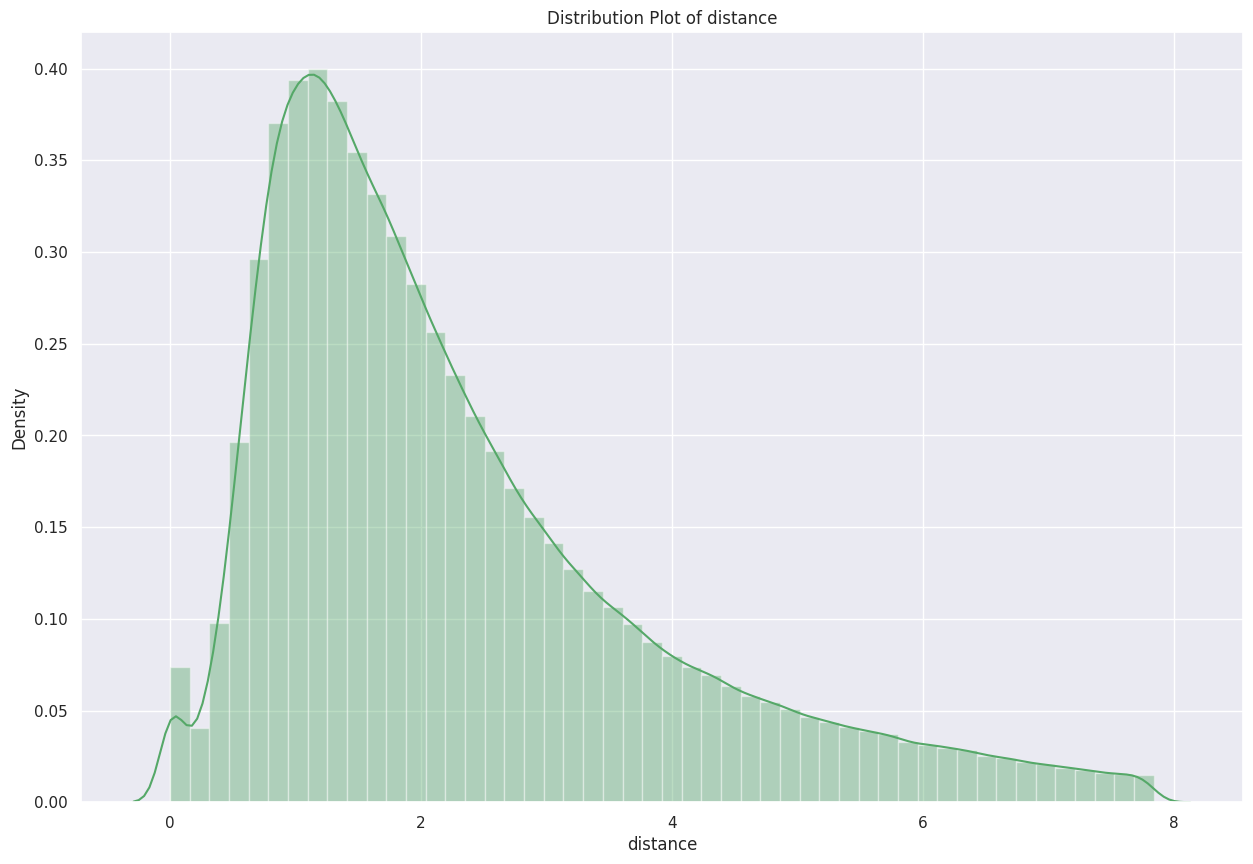

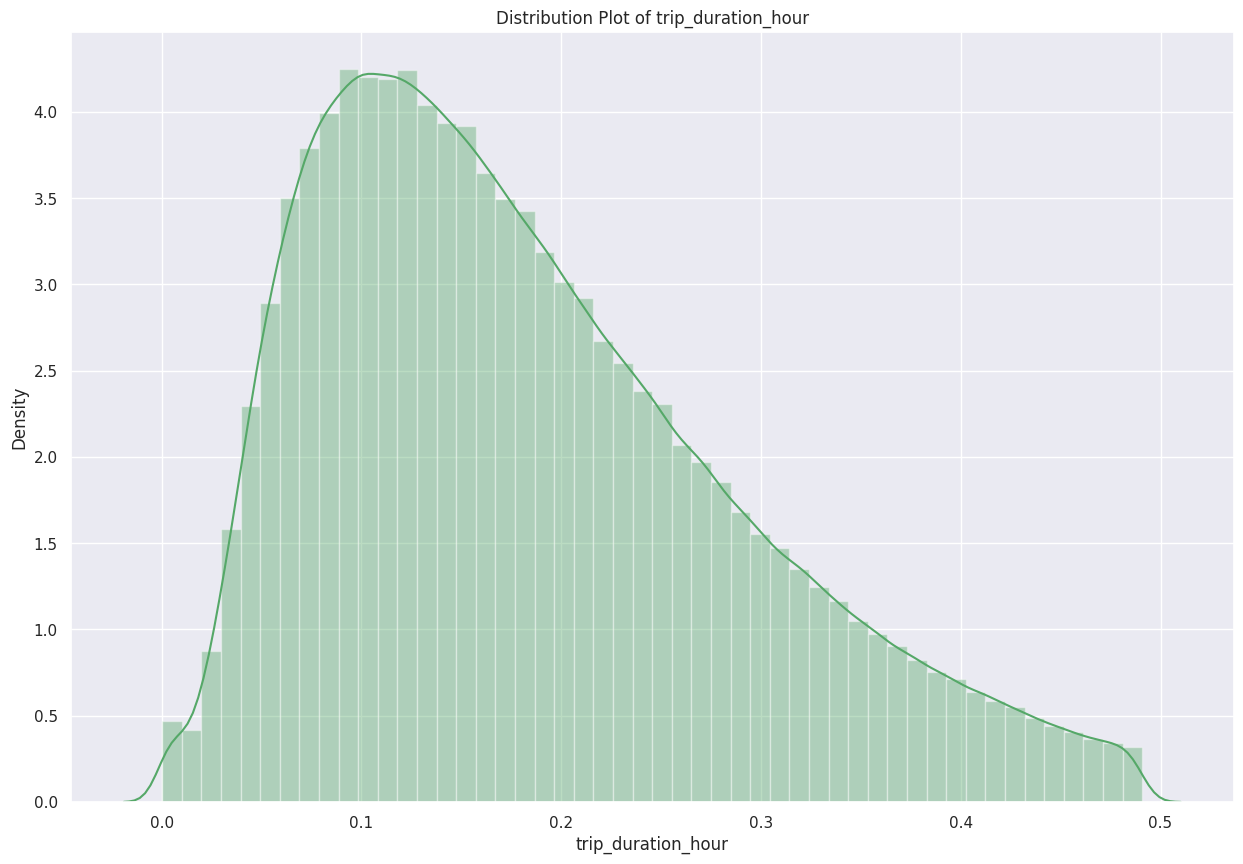

In [ ]:
# Create a list of columns to visualize
sample = ['distance', 'trip_duration_hour']

# Loop through the columns in the sample list and create individual distribution plots
for i in sample:
    # Create a new figure for the distribution plot with a specific size
    plt.figure(figsize=(15, 10))

    # Create a distribution plot for the current column
    sns.distplot(df[i], color="g")

    # Add labels and a title to the plot
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {i}')

    # Display the plot
    plt.show()

In [ ]:

# Dummify the categorical features "store_and_fwd_flag" and "Day" except the label "trip_duration"
df = pd.get_dummies(df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag", "Day"])

# Now the DataFrame 'df' has new columns created from the dummification process
# Each categorical value is turned into a separate binary column for analysis


In [ ]:

# List of features for machine learning models
features = [
    'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour', 'minute',
    'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
    'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']

# This list contains the columns from the DataFrame 'df' that you intend to use as features for machine learning
# These features will be used as input to train and predict in your machine learning models


In [ ]:

# List of columns to include in the new DataFrame 'trip_data'
newdata = [
    'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour', 'minute',
    'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
    'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
    'trip_duration_hour'
]

# Create the new DataFrame 'trip_data' using the specified columns
trip_data = df[newdata]

# 'trip_data' now contains a subset of columns from the original DataFrame 'df'
# that you intend to use as input features for machine learning models, along with the 'trip_duration_hour' column


In [ ]:
df.shape

(1142605, 33)

###Data Segmentation:
Prior to the feature scaling process, we shall proceed to partition our dataset into distinct segments.

In [ ]:
# Import the necessary library for applying z-score and splitting data
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' and you want to perform z-score standardization

# List of features for standardization
features = [
    'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour', 'minute',
    'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
    'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'
]

# Apply z-score standardization to the selected features and limit the data to 100,000 rows
X = df[features].apply(zscore)[:100000]

# Extract the target variable 'trip_duration_hour' and limit it to 100,000 rows
y = df['trip_duration_hour'][:100000]

# Perform train-test split on the standardized features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have standardized features in X_train and X_test, and corresponding target variables in y_train and y_test


In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:

# Split the data into training and testing sets
# X_train and y_train will be used for training, and X_test and y_test will be used for testing
# The test_size parameter determines the proportion of the data to be used for testing (in this case, 20%)
# The random_state parameter ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of the training and testing data arrays

# Shape of the training data
print("Training data - X_train shape:", X_train.shape)
print("Training data - y_train shape:", y_train.shape)

# Shape of the testing data
print("Testing data - X_test shape:", X_test.shape)
print("Testing data - y_test shape:", y_test.shape)


Training data - X_train shape: (80000, 19)
Training data - y_train shape: (80000,)
Testing data - X_test shape: (20000, 19)
Testing data - y_test shape: (20000,)


<a id=corr></a>
# Correlation Analysis
***
Correlation analysis is a statistical technique employed to assess the magnitude of a connection between two or more continuously measured variables. This analytical approach proves valuable in situations where the objective is to ascertain potential associations among variables. In our analysis, we will adopt a heatmap visualization to facilitate this examination.

<a id=heatmap></a>
## Heatmap
***
A heatmap is a visual representation of data that employs a color-coding system to depict the statistical relationships between distinct values.

To initiate the process, we will create a heatmap to illustrate the relationships among the features within the designated Feature selection group.

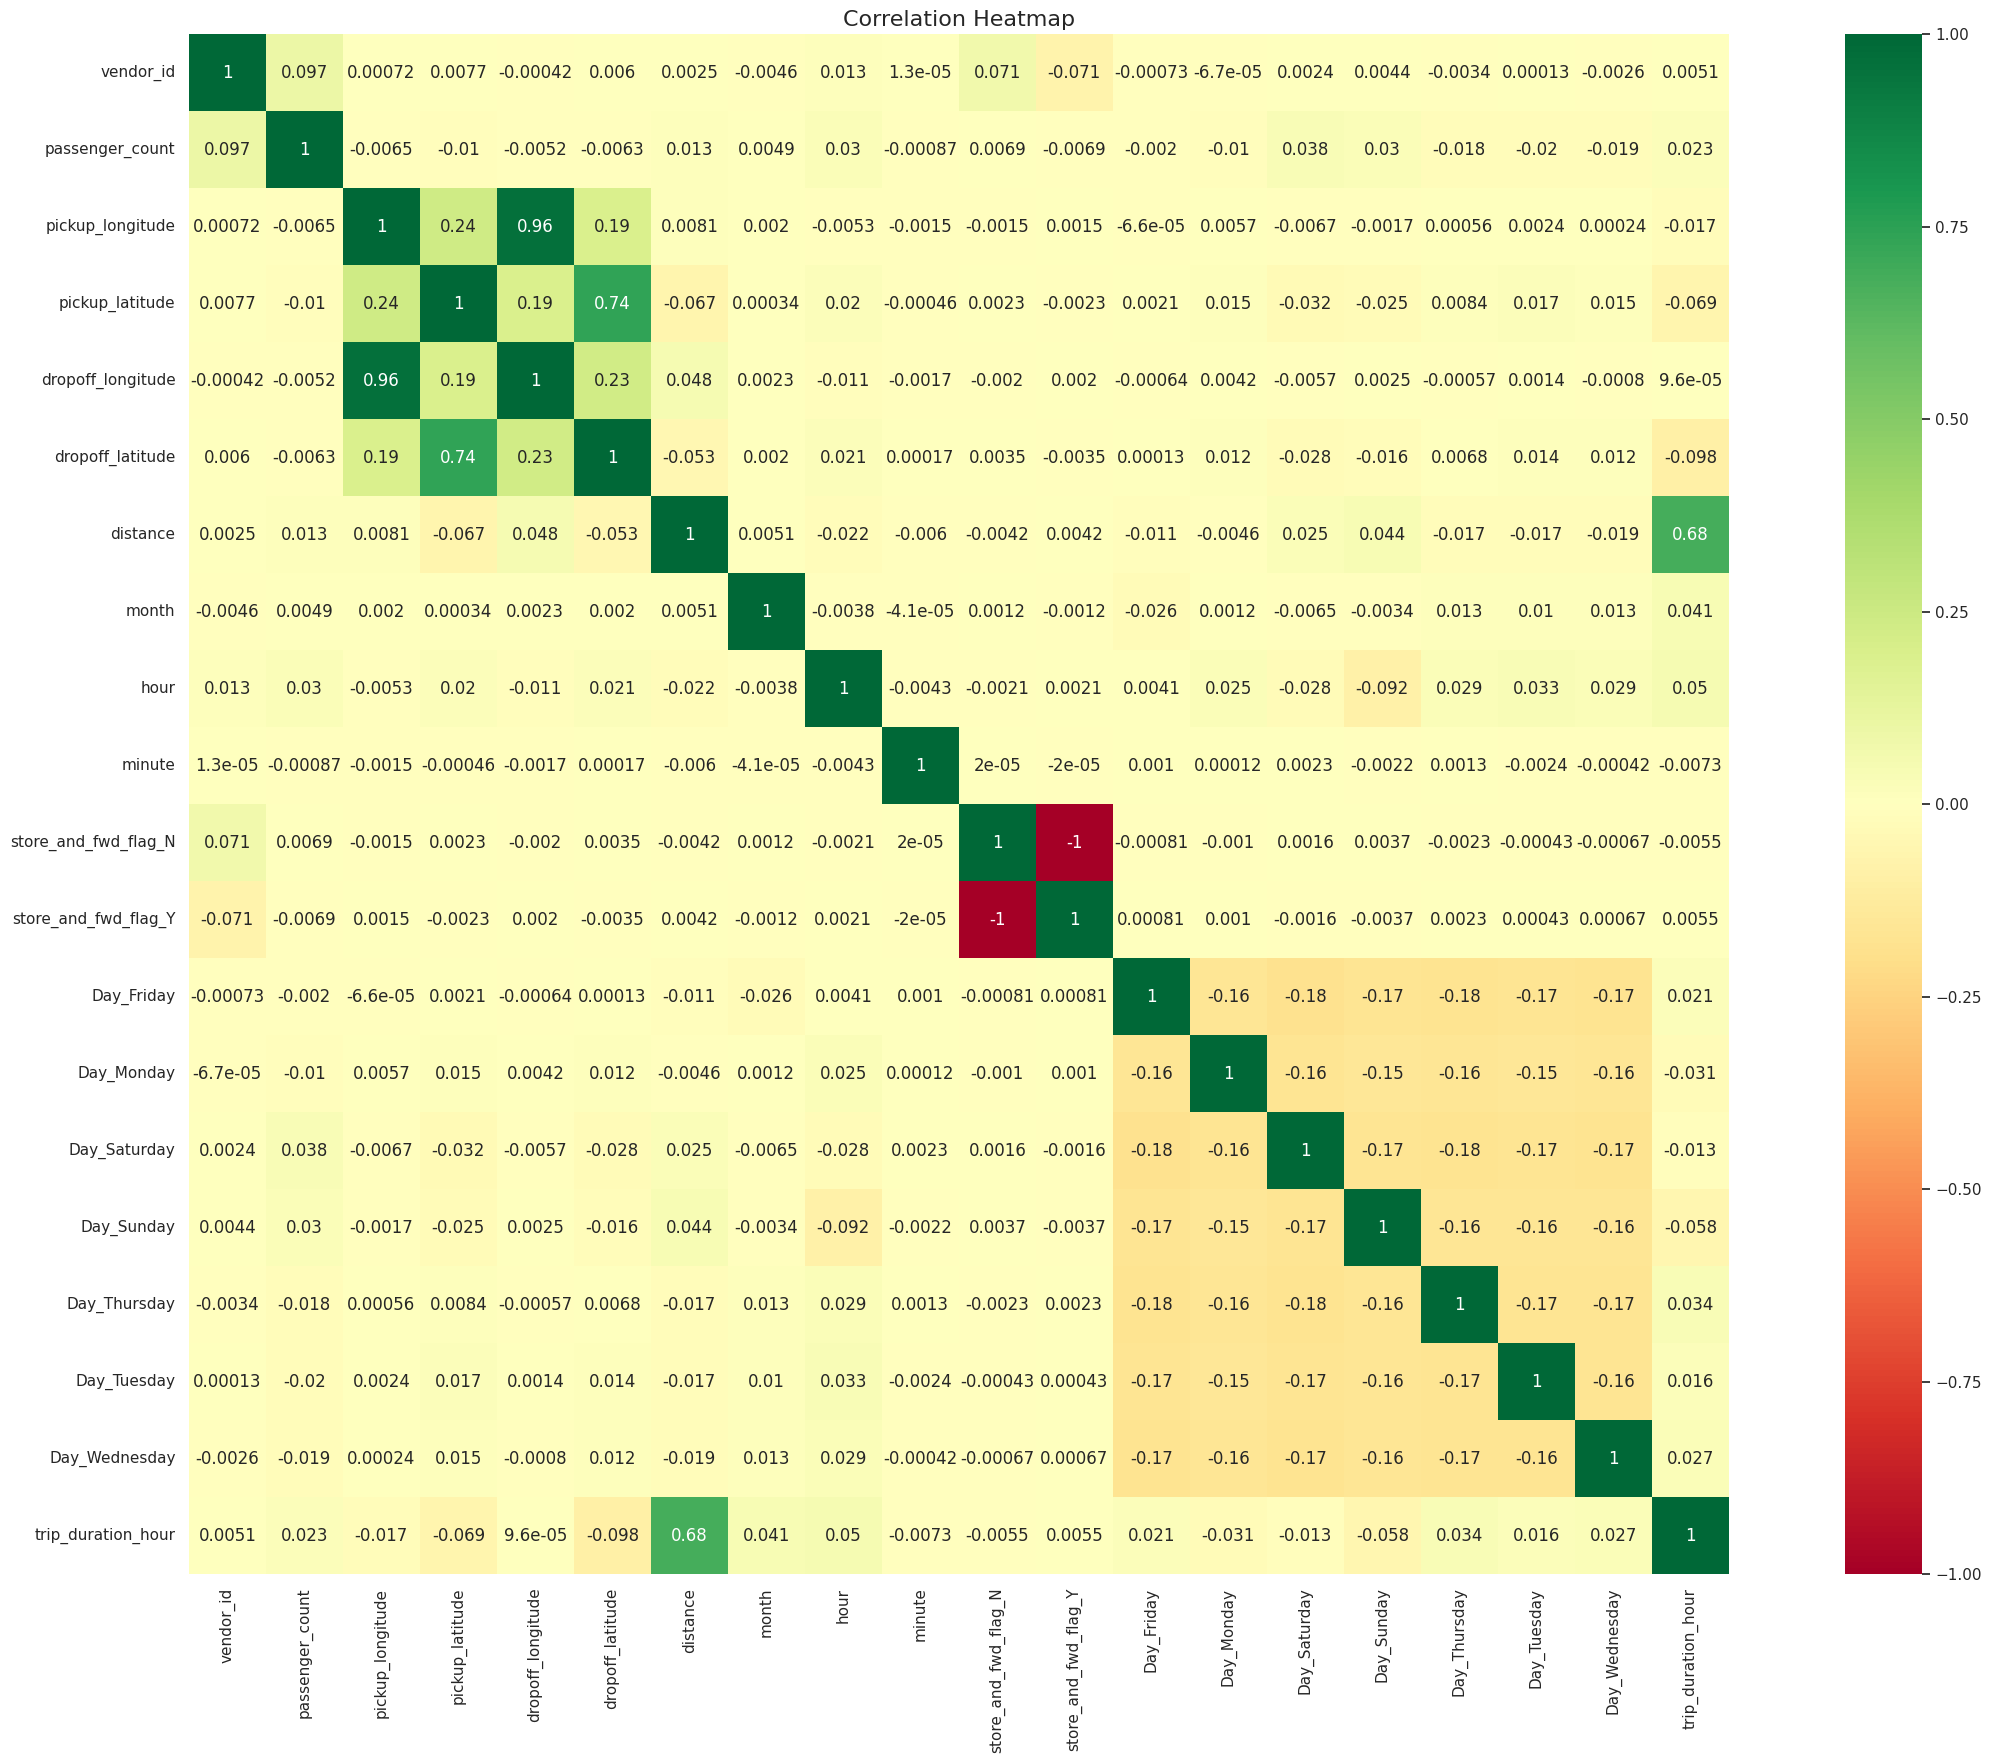

In [ ]:

plt.figure(figsize=(30, 20))
sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True, vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
# Import necessary libraries
from matplotlib import legend
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define a function for evaluation metrics and plotting
def EvaluationMetric(Xt, yt, yp, disp="on"):
    ''' Take different sets of parameters and print evaluation metrics '''

    # Calculate Mean Squared Error (MSE)
    MSE = round(mean_squared_error(y_true=yt, y_pred=yp), 4)

    # Calculate Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)

    # Calculate R-squared (R2) score
    R2 = r2_score(y_true=yt, y_pred=yp)

    # Calculate Adjusted R-squared (Adjusted_R2) score
    Adjusted_R2 = (1 - (1 - r2_score(yt, yp)) * ((Xt.shape[0] - 1) / (Xt.shape[0] - Xt.shape[1] - 1)))

    if disp == "on":
        print("MSE:", MSE, "RMSE:", RMSE)
        print("R2:", R2, "Adjusted R2:", Adjusted_R2)

    # Plotting Actual and Predicted Values
    plt.figure(figsize=(18, 6))
    plt.plot((yp)[:100])
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual and Predicted Time Duration')

    return (MSE, RMSE, R2, Adjusted_R2)



### Linear Regression


Linear regression analysis is a statistical technique employed to forecast the value of a particular variable by considering the value of another variable. The variable that is being predicted is referred to as the dependent variable, while the variable used to anticipate the value of the former is known as the independent variable.

In [ ]:
# Import the necessary library for linear regression
from sklearn.linear_model import LinearRegression

# Assuming you have already split your data into X_train and y_train

# Instantiate the LinearRegression object and fit it to the training data
reg = LinearRegression().fit(X_train, y_train)


In [ ]:
# Calculate the coefficient of determination (R-squared) on the training data
r2_train = reg.score(X_train, y_train)

# Print the R-squared value for the training data
print("R-squared (Training):", r2_train)


R-squared (Training): 0.4977305208213537


In [ ]:
# Use the trained linear regression model to make predictions on the training data
y_pred_train = reg.predict(X_train)


In [ ]:
# Use the trained linear regression model to make predictions on the testing data
y_pred_test = reg.predict(X_test)


MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.4977305208213537 Adjusted R2: 0.49761120199034103


(0.0055, 0.07416198487095663, 0.4977305208213537, 0.49761120199034103)

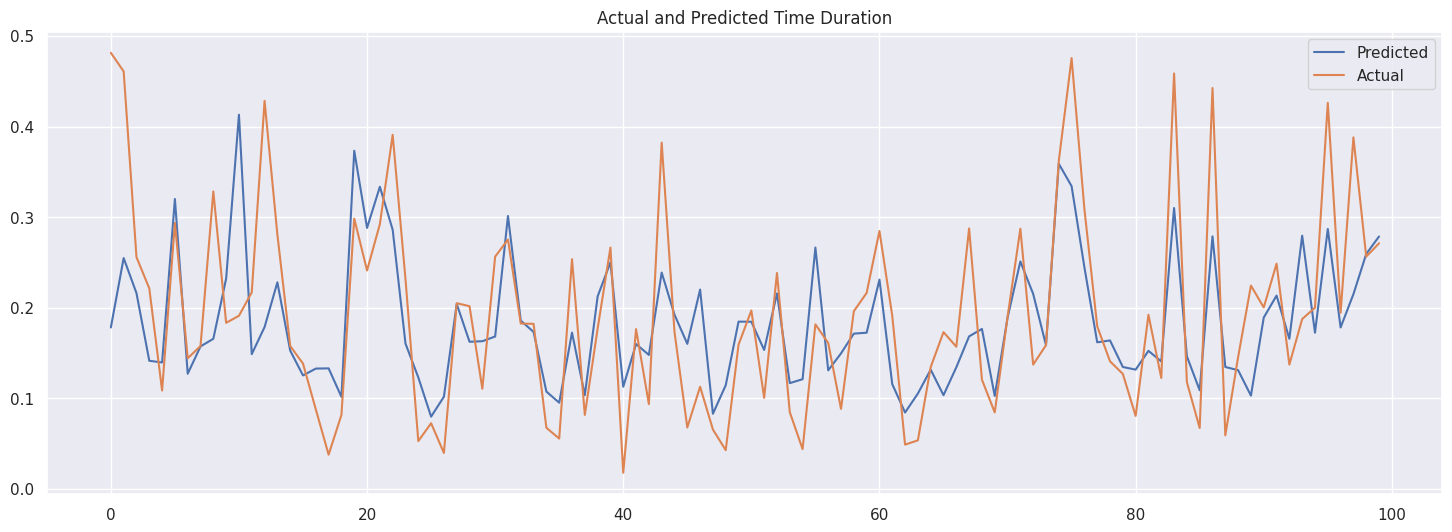

In [ ]:
# Assuming you have defined and imported the EvaluationMetric function
# Evaluate the linear regression model's performance on the training data
EvaluationMetric(X_train, y_train, y_pred_train)



MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.4959572610945383 Adjusted R2: 0.4954779411726563


(0.0055, 0.07416198487095663, 0.4959572610945383, 0.4954779411726563)

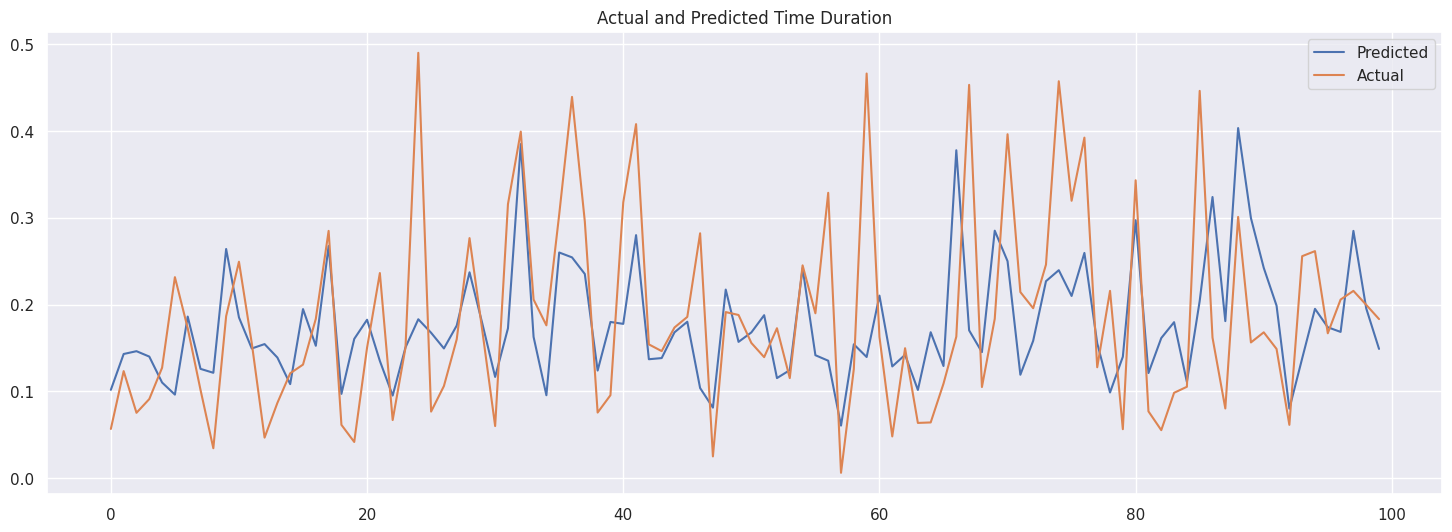

In [ ]:
# Evaluate the linear regression model's performance on the testing data
EvaluationMetric(X_test, y_test, y_pred_test)


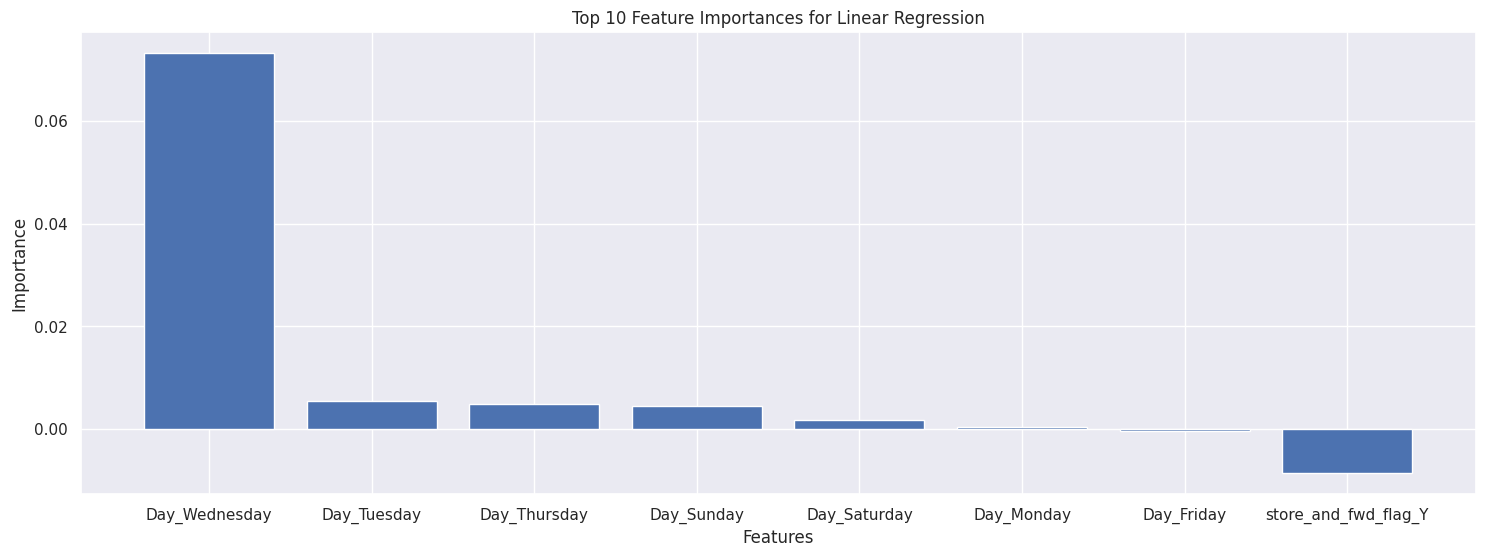

In [ ]:
# Create a figure for the feature importances plot
plt.figure(figsize=(18, 6))

# Get the feature importances (coefficients) from the trained linear regression model
importance = reg.coef_

# Sort the importance values in ascending order
importance = np.sort(importance)

# Get the names of the features
feature = features

# Get the indices of the top 10 most important features (in descending order)
indices = np.argsort(importance)
indices = indices[:10:-1]

# Plotting the features and their importances
sns.set_style("darkgrid")
plt.bar(range(len(indices)), importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances for Linear Regression')
plt.show()

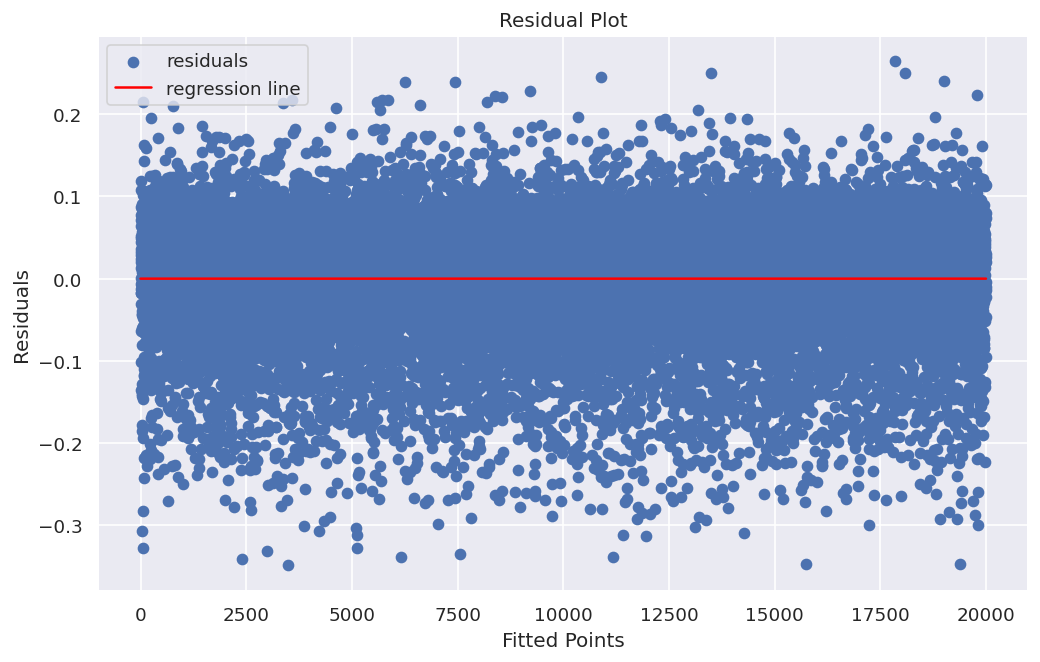

In [ ]:

# Calculate residuals by subtracting predicted values from actual values
residuals = y_pred_test - y_test

# Create a figure for the residual plot
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')

# Create a range of points for the x-axis
f = range(0, len(y_test))

# Create a list of zeros for the y-axis (regression line)
k = [0 for i in range(0, len(y_test))]

# Scatter plot of residuals
plt.scatter(f, residuals, label='residuals')

# Plot a red regression line at y=0
plt.plot(f, k, color='red', label='regression line')

# Set labels and title
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()


### DECISION TREE

A decision tree is a graphical representation resembling a flowchart. In this structure, each internal node corresponds to a "test" conducted on a specific attribute. The branches emerging from these nodes symbolize the potential outcomes of the test, while each leaf node signifies a class label assigned after evaluating all attributes in consideration. This construction allows for the sequential process of decision-making through a series of attribute tests, leading to the assignment of appropriate class labels.

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Define the parameter grid for hyperparameter tuning
param_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV instance for the Decision Tree Regressor with specified parameters
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid=param_dt,
                       cv=5,  # 5-fold cross-validation
                       verbose=2,  # Verbosity level for output
                       scoring='r2'  # Scoring metric for evaluation
                       )

# Perform grid search by fitting the model to training data
dt_grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................max_depth=None, min_samples_split=2; total time=   1.0s
[CV] END ................max_depth=None, min_samples_split=2; total time=   1.0s
[CV] END ................max_depth=None, min_samples_split=2; total time=   1.0s
[CV] END ................max_depth=None, min_samples_split=2; total time=   1.1s
[CV] END ................max_depth=None, min_samples_split=2; total time=   1.0s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.9s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.9s
[CV] END ................max_depth=None, min_samples_split=5; total time=   1.0s
[CV] END ................max_depth=None, min_samples_split=5; total time=   1.4s
[CV] END ................max_depth=None, min_samples_split=5; total time=   1.3s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   1.3s
[CV] END ...............max_depth=None, min_sampl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [ ]:

#Create a Decision Tree classifier instance
dt_classifier =DecisionTreeRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV instance with the Decision Tree classifier and parameter grid
dt_grid = GridSearchCV(dt_classifier, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
dt_grid.fit(X_train, y_train)

# Access the best cross-validated score from the grid search results
best_cross_val_score = dt_grid.best_score_

# Print the best cross-validated score found during grid search
print("Best Cross-Validated Score:", best_cross_val_score)



Best Cross-Validated Score: 0.5985624929661624


In [ ]:
# Access the best cross-validated score from the grid search results
best_cross_val_score = dt_grid.best_score_

# Print the best cross-validated score found during grid search
print("Best Cross-Validated Score:", best_cross_val_score)


Best Cross-Validated Score: 0.5985624929661624


In [ ]:
# Access the best estimator (model with best hyperparameters) from the grid search results
best_model = dt_grid.best_estimator_

# Print the details of the best model
print("Best Model:", best_model)


Best Model: DecisionTreeRegressor(max_depth=10, min_samples_split=10)


In [ ]:
# Assign the best estimator (model with best hyperparameters) from the grid search results to a variable
dt_optimal_model = dt_grid.best_estimator_


In [ ]:
# Predict using the optimal Decision Tree model on the test set
y_pred_dt_test = dt_optimal_model.predict(X_test)

# Predict using the optimal Decision Tree model on the training set
y_pred_dt_train = dt_optimal_model.predict(X_train)


In [ ]:

# Predict using the optimized Decision Tree model on the test and train datasets

# y_pred_dt_test will store the predicted labels for the test dataset
y_pred_dt_test = dt_optimal_model.predict(X_test)

# y_pred_dt_train will store the predicted labels for the train dataset
y_pred_dt_train = dt_optimal_model.predict(X_train)


MSE: 0.0039 RMSE: 0.06244997998398398
R2: 0.6502362858127695 Adjusted R2: 0.6501531961582364


(0.0039, 0.06244997998398398, 0.6502362858127695, 0.6501531961582364)

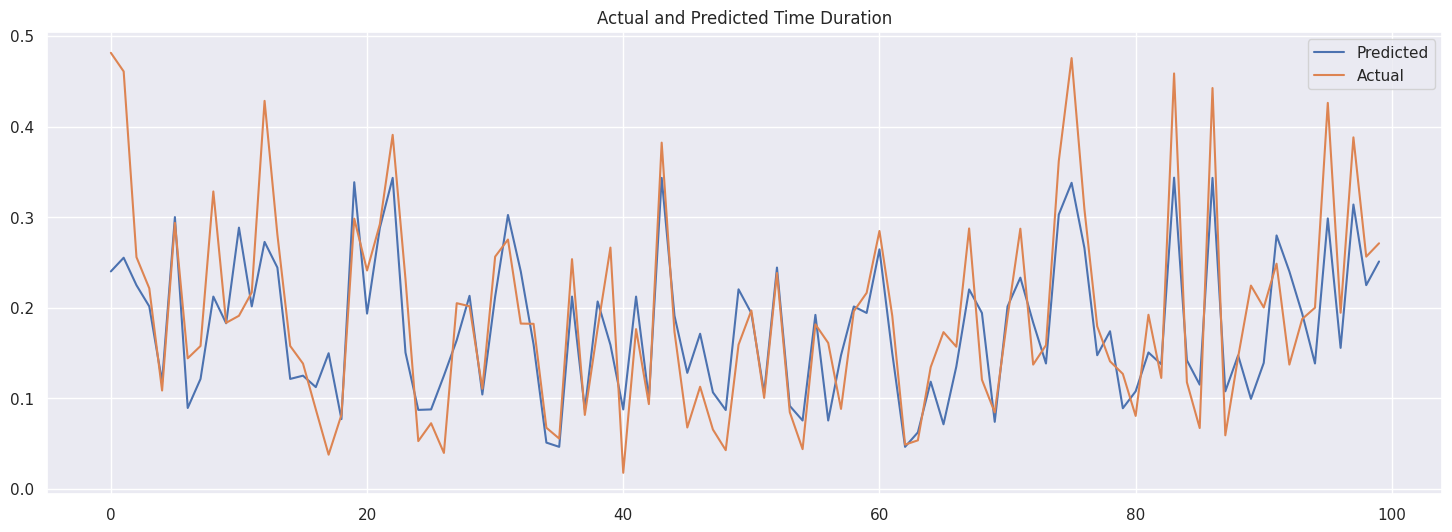

In [ ]:
# Evaluate the performance of the Decision Tree model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_dt_train)


MSE: 0.0044 RMSE: 0.066332495807108
R2: 0.5974445579407391 Adjusted R2: 0.5970617474603024


(0.0044, 0.066332495807108, 0.5974445579407391, 0.5970617474603024)

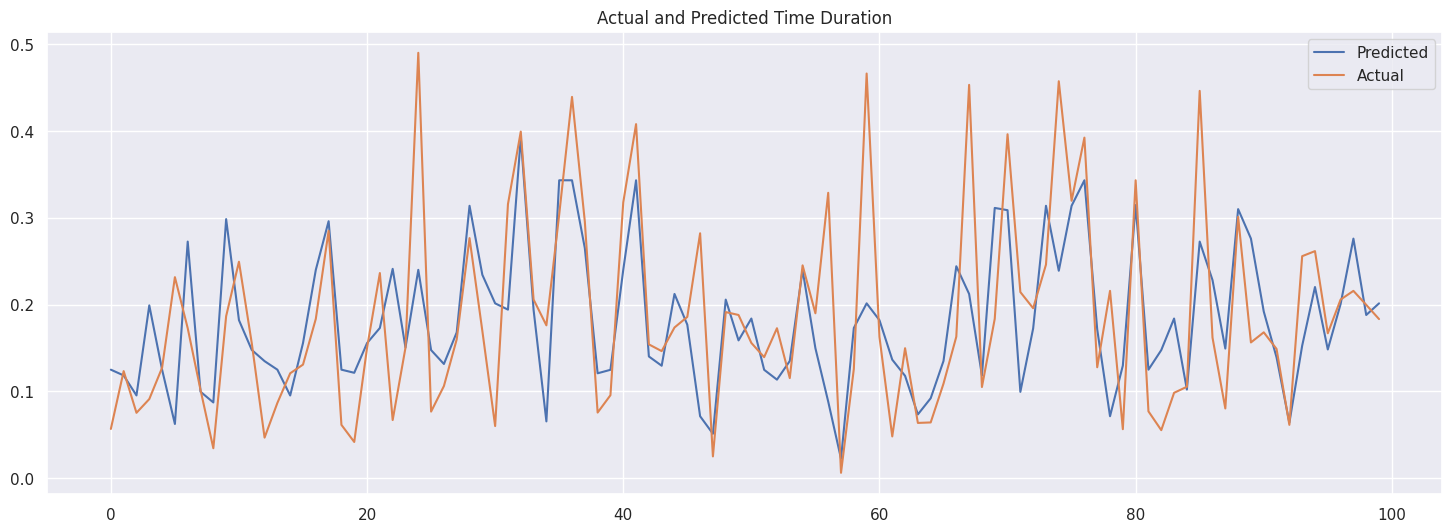

In [ ]:
# Evaluate the performance of the Decision Tree model on the test set using custom EvaluationMetric function
EvaluationMetric(X_test, y_test, y_pred_dt_test)


In [ ]:
# Get the list of column names in the X_train dataset
column_names = X_train.columns


In [ ]:

# Get the feature importances from the optimized Decision Tree model
feature_importances = dt_optimal_model.feature_importances_


In [ ]:

# Get the feature importances from the optimized Decision Tree model
importances = dt_optimal_model.feature_importances_

# Create a dictionary to store feature names and their corresponding importances
importance_dict = {'Feature': list(X_train.columns),
                   'Feature Importance': importances}

# Create a DataFrame from the importance dictionary
importance_df = pd.DataFrame(importance_dict)


In [ ]:
# Sort the importance DataFrame by 'Feature Importance' column in descending order
importance_df.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

# Display the sorted importance DataFrame
importance_df


Feature  Feature Importance
6               distance            0.789235
8                   hour            0.089788
5       dropoff_latitude            0.051867
15            Day_Sunday            0.016645
4      dropoff_longitude            0.012988
14          Day_Saturday            0.012941
2       pickup_longitude            0.010294
3        pickup_latitude            0.005980
9                 minute            0.002669
13            Day_Monday            0.002078
7                  month            0.001267
12            Day_Friday            0.001180
1        passenger_count            0.000970
0              vendor_id            0.000932
16          Day_Thursday            0.000725
17           Day_Tuesday            0.000249
18         Day_Wednesday            0.000193
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

<Axes: title={'center': 'Feature Importance'}, xlabel='Feature', ylabel='Feature Importance'>

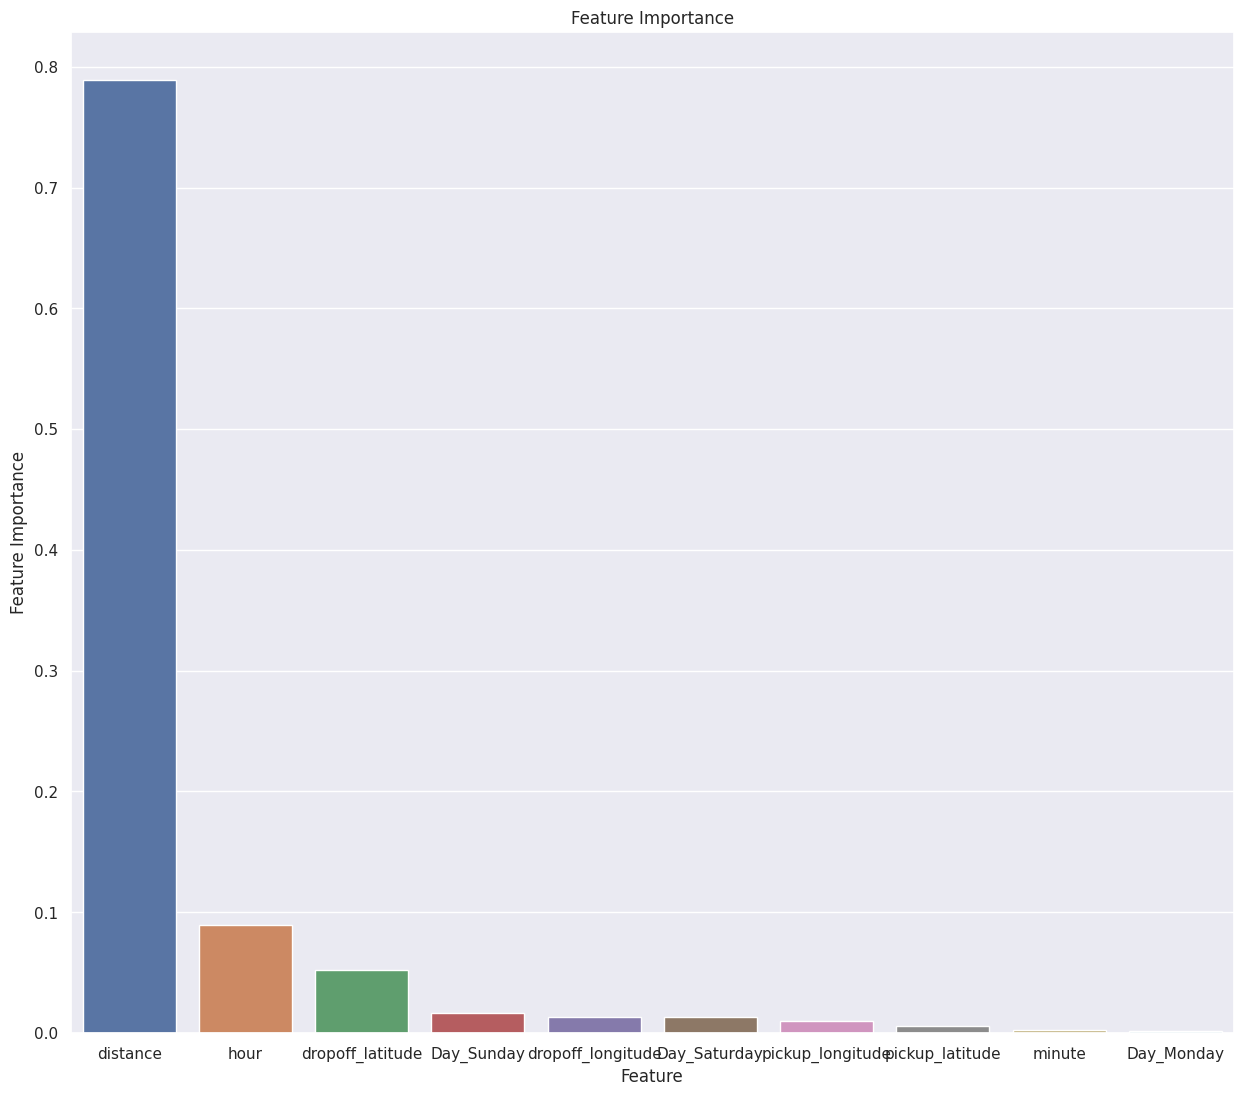

In [ ]:

# Set the figure size for the plot
plt.figure(figsize=(15, 13))

# Set the title for the plot
plt.title('Feature Importance')

# Create a bar plot using seaborn to visualize the top 10 features and their importances
sns.barplot(x='Feature', y='Feature Importance', data=importance_df[:10])


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


In [ ]:
# Create a Graphviz visualization of the Decision Tree using the optimal model
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None, feature_names=X_train.columns, filled=True))

# Display the Decision Tree visualization using SVG format
display(SVG(graph.pipe(format='svg')))


### Regularization

Regularization is a crucial technique employed in machine learning to mitigate errors and enhance the generalization capability of models. It achieves this by effectively fitting the model to the training data while simultaneously preventing the model from becoming overly complex, which can lead to overfitting. Overfitting occurs when a model captures noise and fluctuations in the training data, which doesn't generalize well to new, unseen data. Regularization techniques add constraints or penalties to the model's parameters during training, discouraging them from taking extreme values. This helps strike a balance between fitting the training data and maintaining simplicity, resulting in improved performance on unseen data."







### Lasso Regression
"Lasso Regression (Least Absolute Shrinkage and Selection Operator) introduces the 'absolute magnitude value' of coefficients as a penalty term into the loss function."

In [ ]:

# Create an instance of Lasso Regression
lasso = Lasso()

# Define a set of alpha values for tuning
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Create a GridSearchCV instance with Lasso Regression, alpha values, r2 scoring, and 5-fold cross-validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

# Fit the GridSearchCV model to the training data
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Calculate the R-squared score of the Lasso Regression model on the training data
train_r2_score = lasso_regressor.score(X_train, y_train)


In [ ]:
# Print the best fit alpha value found by GridSearchCV
print("The best fit alpha value is found out to be:", lasso_regressor.best_params_)

# Print the best negative mean squared error obtained using the best fit alpha
print("Using", lasso_regressor.best_params_, "the negative mean squared error is:", lasso_regressor.best_score_)


The best fit alpha value is found out to be: {'alpha': 1e-05}
Using {'alpha': 1e-05} the negative mean squared error is: 0.49743409794998084


In [ ]:
# Make predictions using the Lasso Regression model on the test data
y_pred_lasso = lasso_regressor.predict(X_test)

# Make predictions using the Lasso Regression model on the training data
y_pred_lasso_train = lasso_regressor.predict(X_train)


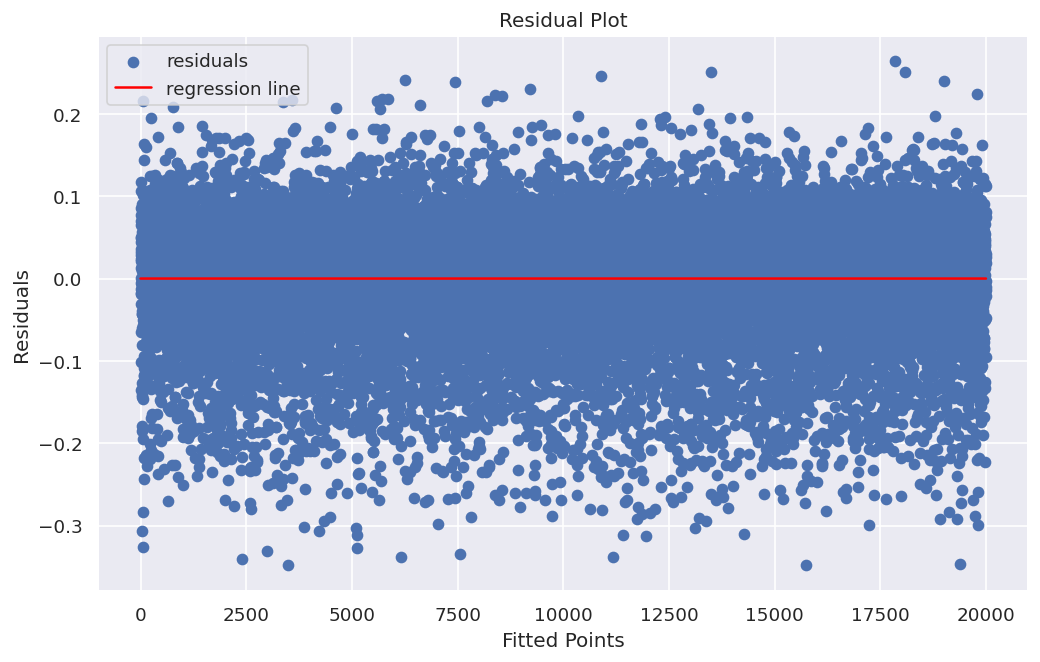

In [ ]:
# Calculate the residuals by subtracting the true y values from the predicted y values
residuals = y_pred_lasso - y_test

# Create a residual plot to check for heteroskedasticity
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')

# Scatter plot of residuals
plt.scatter(range(0, len(y_test)), residuals, label='residuals')

# Plotting the regression line
plt.plot(range(0, len(y_test)), [0] * len(y_test), color='red', label='regression line')

plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()


MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.49777384114433354 Adjusted R2: 0.49765453260447035


(0.0055, 0.07416198487095663, 0.49777384114433354, 0.49765453260447035)

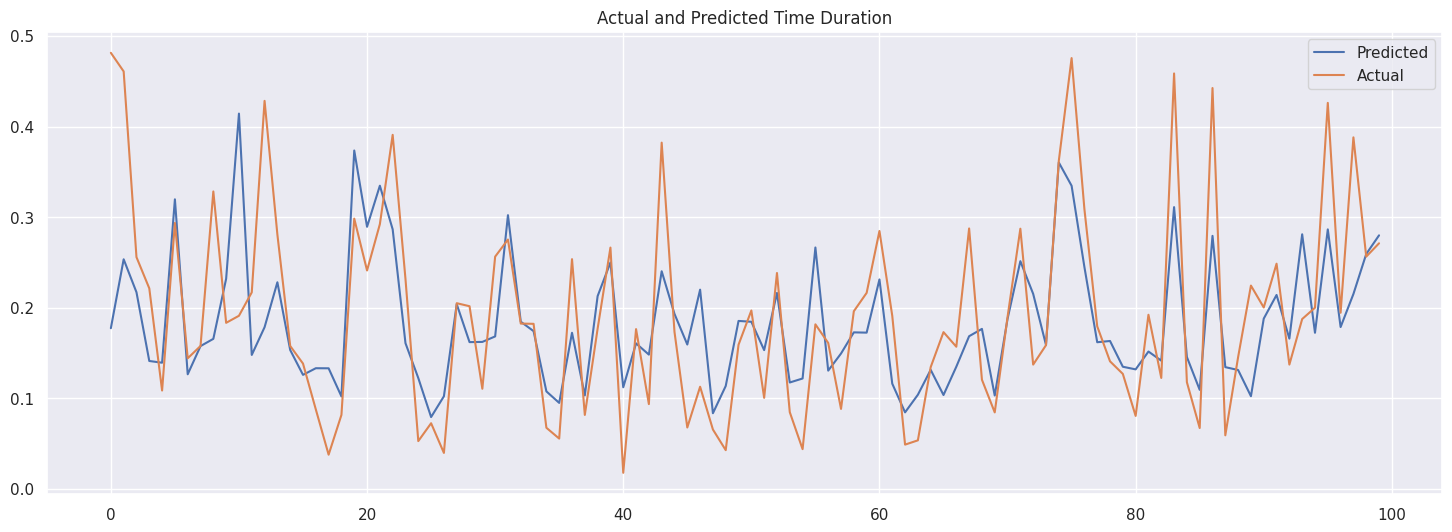

In [ ]:
# Evaluate the performance of the Lasso Regression model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_lasso_train)


MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.4959639849994407 Adjusted R2: 0.4954846714716624


(0.0055, 0.07416198487095663, 0.4959639849994407, 0.4954846714716624)

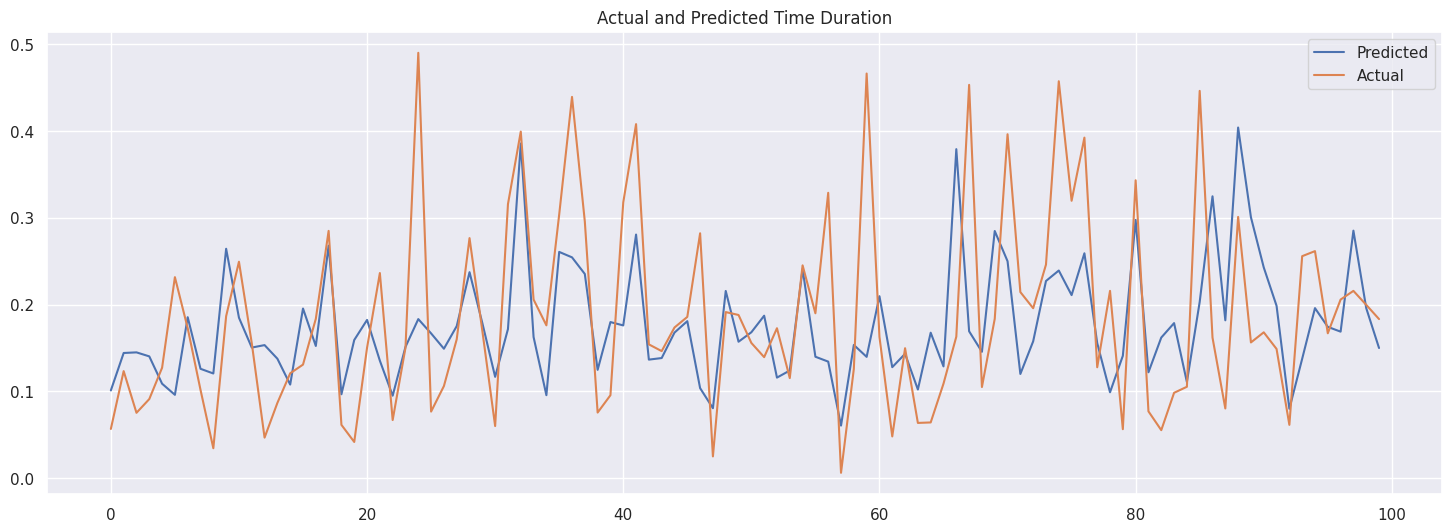

In [ ]:
# Evaluate the performance of the Lasso Regression model on the test set using custom EvaluationMetric function
EvaluationMetric(X_test, y_test, y_pred_lasso)


### Ridge Regression

"Ridge regression incorporates the 'squared magnitude' of coefficients as a penalty term into the loss function. The emphasized aspect signifies the inclusion of L2 regularization."

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create an instance of Ridge Regression
ridge = Ridge()

# Define a set of alpha values for tuning
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Create a GridSearchCV instance with Ridge Regression, alpha values, r2 scoring, and 5-fold cross-validation
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

# Fit the GridSearchCV model to the training data
ridge_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Calculate the R-squared score of the Ridge Regression model on the training data
train_r2_score_ridge = ridge_regressor.score(X_train, y_train)


In [ ]:
# Print the best fit alpha value found by GridSearchCV for Ridge Regression
print("The best fit alpha value is found out to be:", ridge_regressor.best_params_)

# Print the best negative mean squared error obtained using the best fit alpha for Ridge Regression
print("Using", ridge_regressor.best_params_, "the negative mean squared error is:", ridge_regressor.best_score_)


The best fit alpha value is found out to be: {'alpha': 60}
Using {'alpha': 60} the negative mean squared error is: 0.4974346416045323


In [ ]:
# Make predictions using the Ridge Regression model on the test data
y_pred_ridge_test = ridge_regressor.predict(X_test)

# Make predictions using the Ridge Regression model on the training data
y_pred_ridge_train = ridge_regressor.predict(X_train)


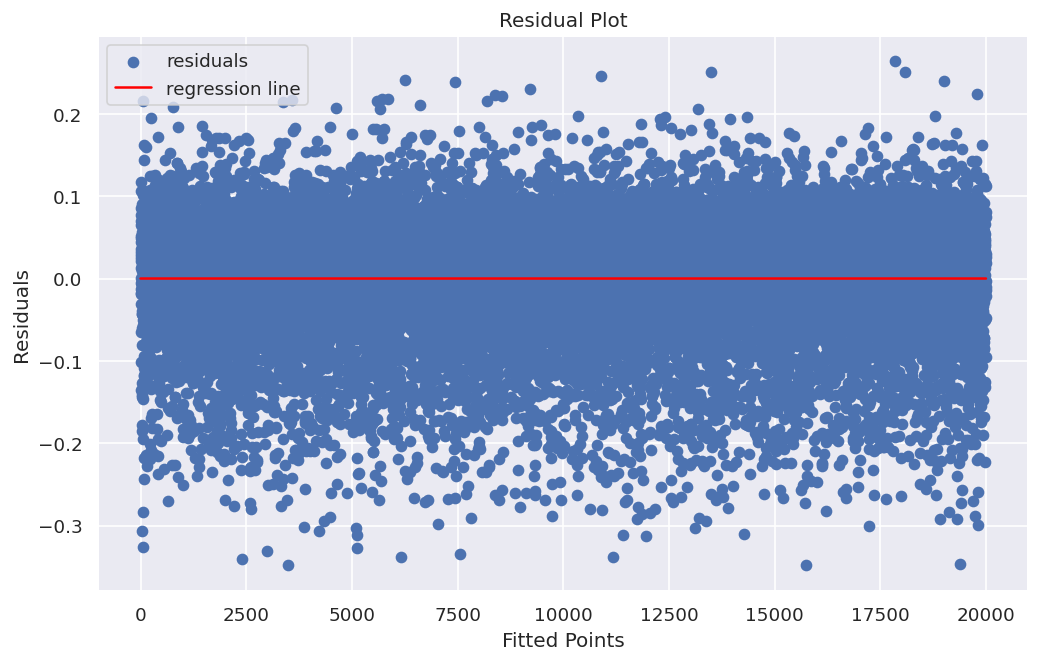

In [ ]:
# Calculate the residuals by subtracting the true y values from the predicted y values using Ridge Regression
residuals = y_pred_ridge_test - y_test

# Create a residual plot to check for heteroskedasticity
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')

# Scatter plot of residuals
plt.scatter(range(0, len(y_test)), residuals, label='residuals')

# Plotting the regression line
plt.plot(range(0, len(y_test)), [0] * len(y_test), color='red', label='regression line')

plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()


MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.4977736865885174 Adjusted R2: 0.497654378011938


(0.0055, 0.07416198487095663, 0.4977736865885174, 0.497654378011938)

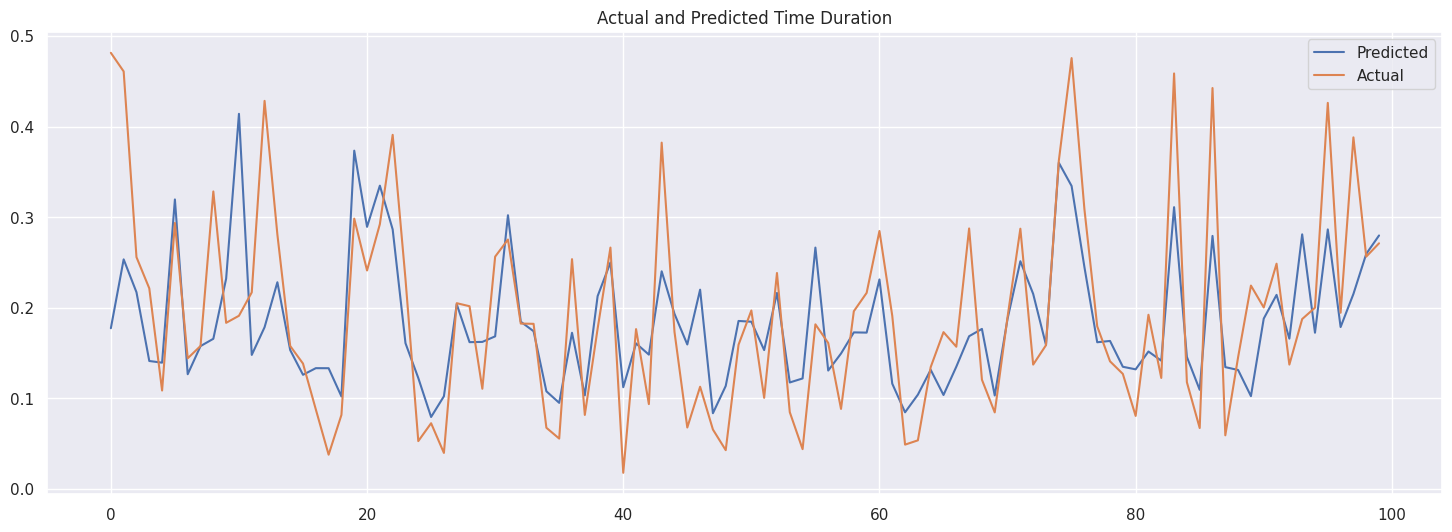

In [ ]:
# Evaluate the performance of the Ridge Regression model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_ridge_train)


MSE: 0.0055 RMSE: 0.07416198487095663
R2: 0.49596611110990096 Adjusted R2: 0.4954867996039495


(0.0055, 0.07416198487095663, 0.49596611110990096, 0.4954867996039495)

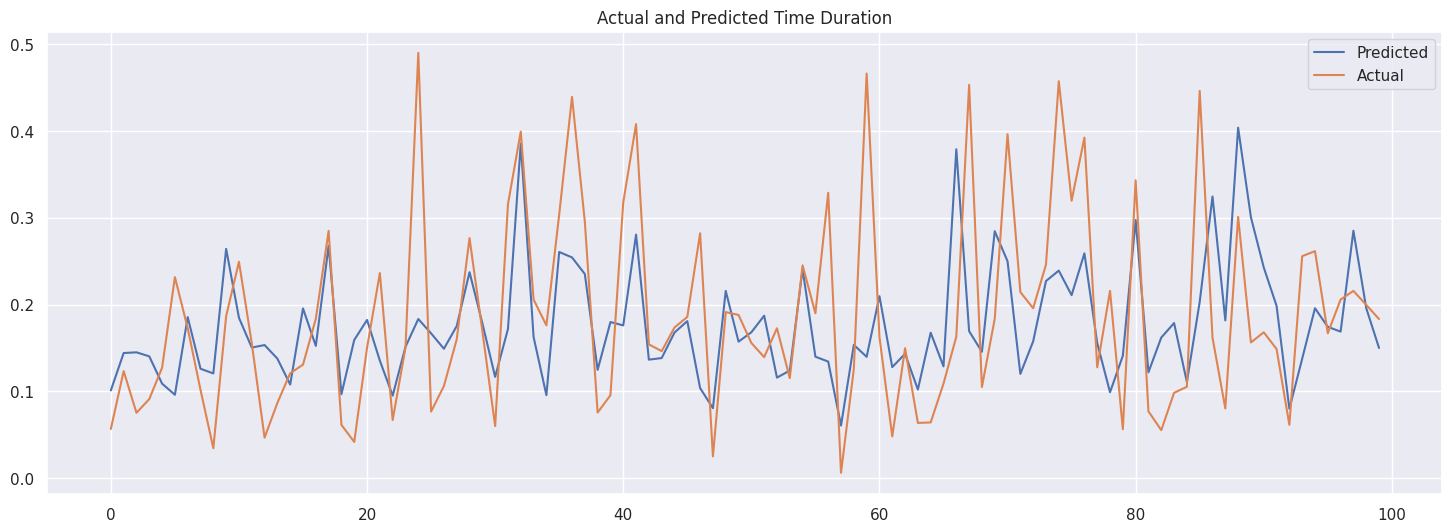

In [ ]:
# Evaluate the performance of the Ridge Regression model on the test set using custom EvaluationMetric function
EvaluationMetric(X_test, y_test, y_pred_ridge_test)


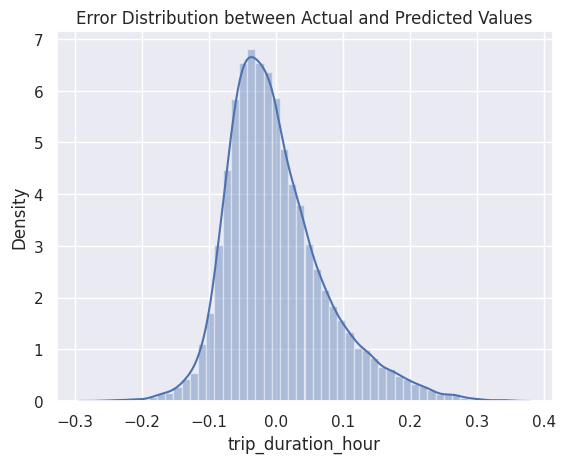

In [ ]:
# Create a distribution plot of the errors between actual and predicted values
sns.distplot(y_test - y_pred_ridge_test)
plt.title("Error Distribution between Actual and Predicted Values")
plt.show()

### XGBoost

"XGBoost stands as a refined distributed gradient boosting library, meticulously crafted for exceptional efficiency, adaptability, and portability. It executes machine learning algorithms within the Gradient Boosting framework. XGBoost offers a parallelized tree boosting technique (also recognized as GBDT, GBM) that adeptly addresses diverse data science challenges, delivering both rapidity and precision."

In [ ]:
# Define a list of values for the number of trees
n_estimators = [50, 100, 120]

# Define a list of values for the maximum depth of trees
max_depth = [5, 7, 9]

# Define a list of values for the minimum number of samples required to split an internal node
min_samples_split = [40, 50]

# Create a hyperparameter grid for XGBoost
param_xgb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}


In [ ]:
# Import the XGBRegressor class from the xgboost library
import xgboost as xgb

# Create an instance of the XGBRegressor
xgb_model = xgb.XGBRegressor()

# Perform grid search using GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_xgb, cv=3, verbose=2, scoring="r2")

# Fit the grid search model to the training data
xgb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[05:39:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   4.9s
[05:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   4.6s
[05:39:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.4s
[05:39:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=  10.2s
[05:39:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=  20.0s
[05:40:06] WARNING: ../src/learner.cc:767: 
Parameters: { "

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
# Get the best R-squared score obtained from the XGBoost grid search
best_r2_score_xgb = xgb_grid.best_score_


In [ ]:
# Get the best hyperparameters found during the XGBoost grid search
best_params_xgb = xgb_grid.best_params_


In [ ]:
# Get the best estimator (optimal model) from the XGBoost grid search
xgb_optimal_model = xgb_grid.best_estimator_


In [ ]:
# Make predictions using the optimal XGBoost model on the test data
y_pred_xgb_test = xgb_optimal_model.predict(X_test)

# Make predictions using the optimal XGBoost model on the training data
y_pred_xgb_train = xgb_optimal_model.predict(X_train)



MSE: 0.0021 RMSE: 0.0458257569495584
R2: 0.8080231130954494 Adjusted R2: 0.8079775071833315


(0.0021, 0.0458257569495584, 0.8080231130954494, 0.8079775071833315)

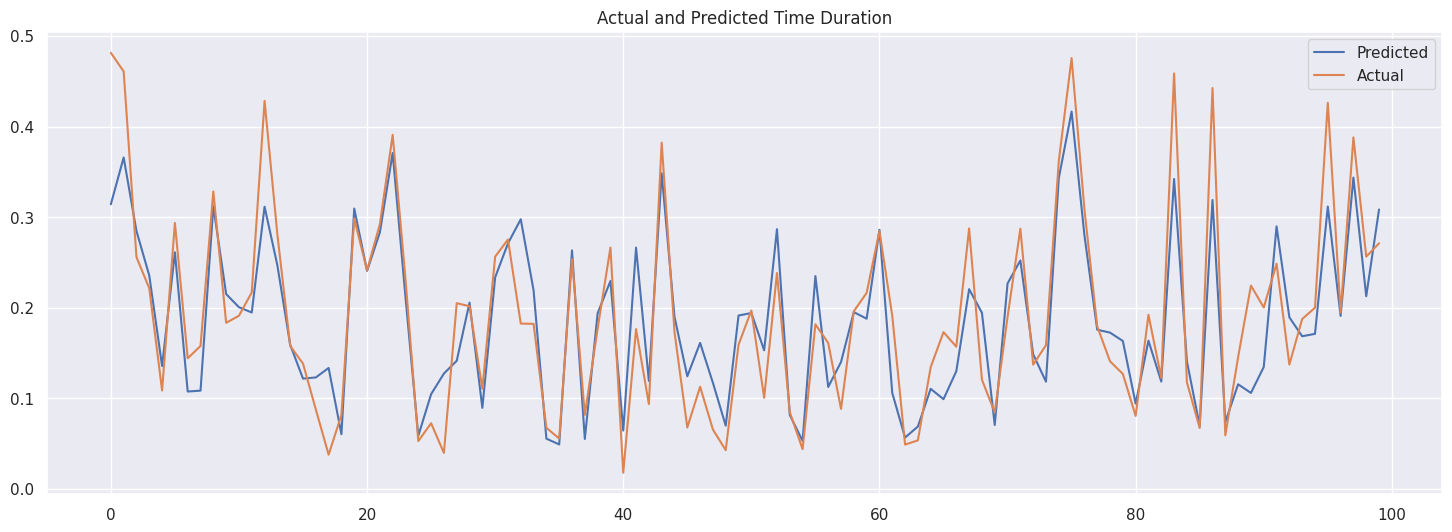

In [ ]:
# Evaluate the performance of the XGBoost model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_xgb_train)


MSE: 0.0032 RMSE: 0.0565685424949238
R2: 0.7076042982746114 Adjusted R2: 0.7073262443040016


(0.0032, 0.0565685424949238, 0.7076042982746114, 0.7073262443040016)

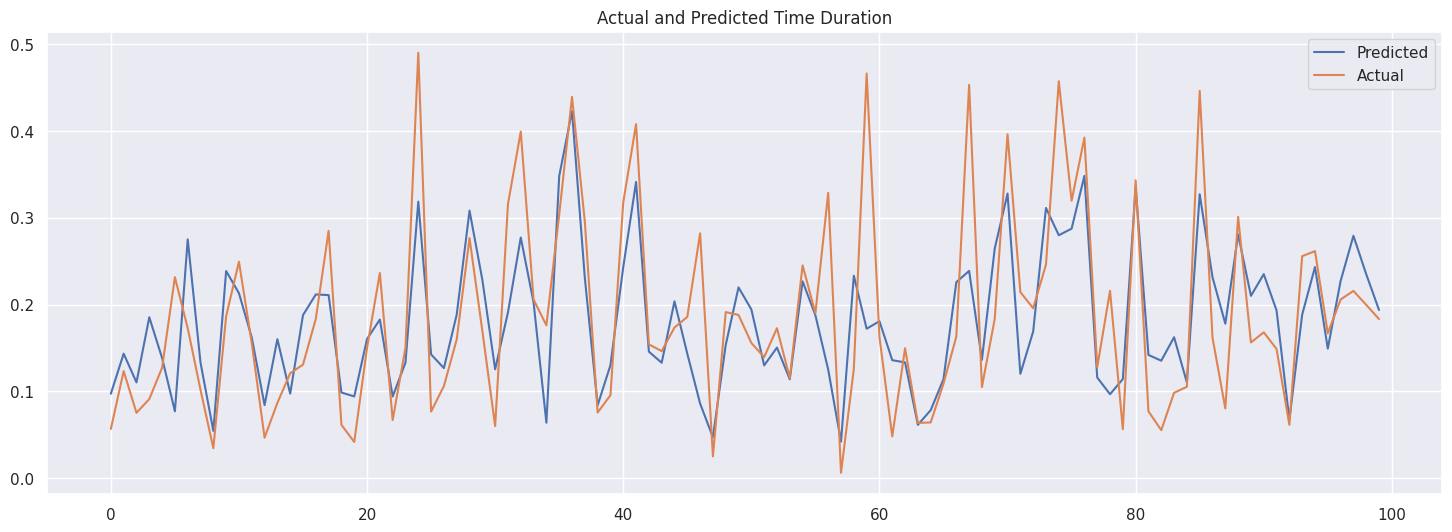

In [ ]:
# Evaluate the performance of the XGBoost model on the test set using custom EvaluationMetric function
EvaluationMetric(X_test, y_test, y_pred_xgb_test)


In [ ]:
# Print the column names of the features in the training data
print(X_train.columns)


Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')


In [ ]:
# Get the feature importances from the optimal XGBoost model
feature_importances = xgb_optimal_model.feature_importances_


In [ ]:
# Get the feature importances from the optimal XGBoost model
importances = xgb_optimal_model.feature_importances_

# Create a dictionary to store feature names and their importance scores
importance_dict = {'Feature': list(X_train.columns),
                   'Feature Importance': importances}

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame(importance_dict)


In [ ]:
# Sort the DataFrame by 'Feature Importance' column in descending order
importance_df.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

# Display the sorted importance DataFrame
importance_df


Feature  Feature Importance
6               distance            0.429874
15            Day_Sunday            0.130289
8                   hour            0.084351
14          Day_Saturday            0.077628
13            Day_Monday            0.055691
5       dropoff_latitude            0.040598
4      dropoff_longitude            0.023752
17           Day_Tuesday            0.021377
2       pickup_longitude            0.019810
3        pickup_latitude            0.019621
12            Day_Friday            0.018838
7                  month            0.016314
16          Day_Thursday            0.015814
18         Day_Wednesday            0.013489
10  store_and_fwd_flag_N            0.010403
9                 minute            0.009925
0              vendor_id            0.006610
1        passenger_count            0.005617
11  store_and_fwd_flag_Y            0.000000

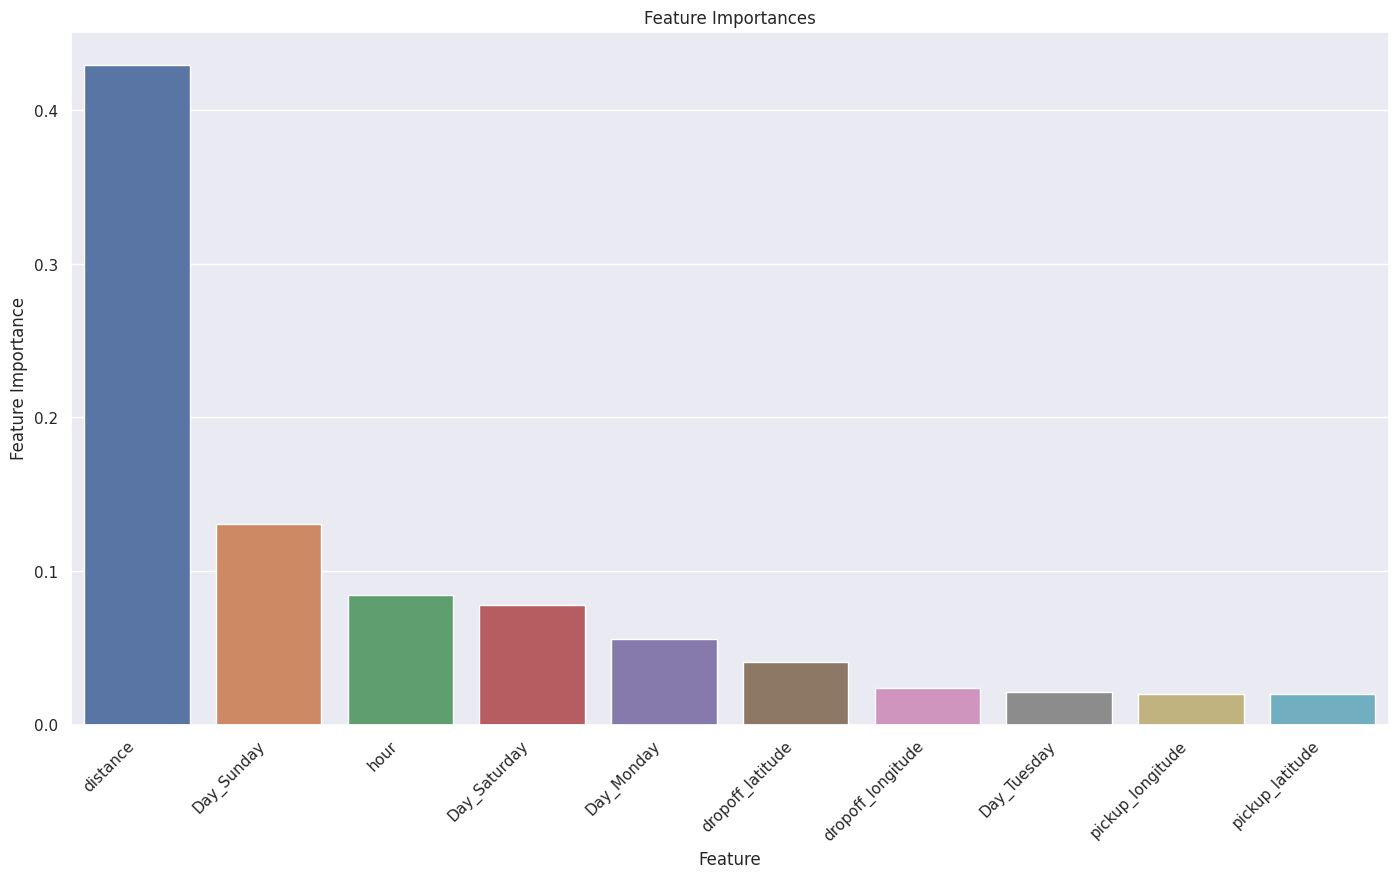

In [ ]:

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(17, 9))
plt.title('Feature Importances')
sns.barplot(x='Feature', y='Feature Importance', data=importance_df[:10])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()


### GradientBoosting

"Gradient boosting, a machine learning method applicable to regression and classification tasks, offers a predictive model manifested as a blend of feeble prediction models—often decision trees. In instances where a decision tree functions as the feeble learner, the outcome is termed gradient-boosted trees."

In [ ]:
# Define a list of values for the number of trees
n_estimators = [100, 120]

# Define a list of values for the maximum depth of trees
max_depth = [5, 8, 10]

# Define a list of values for the minimum number of samples required to split a node
min_samples_split = [50, 80]

# Define a list of values for the minimum number of samples required at each leaf node
min_samples_leaf = [40, 50]

# Create a hyperparameter grid for Gradient Boosting
param_gb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [ ]:
# Import the GradientBoostingRegressor class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Perform grid search using GridSearchCV
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_gb,
                       cv=3, verbose=2, scoring='r2')

# Fit the grid search model to the training data
gb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  25.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  25.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  25.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  30.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  30.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  30.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  25.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  25.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  24.6s
[CV] END max_depth=5,

In [ ]:
# Get the best hyperparameters found during the Gradient Boosting grid search
best_params_gb = gb_grid.best_params_


In [ ]:

# Get the best estimator (optimal model) from the Gradient Boosting grid search
gb_optimal_model = gb_grid.best_estimator_


In [ ]:
# Get the best estimator (optimal model) from the Gradient Boosting grid search
gb_optimal_model = gb_grid.best_estimator_


In [ ]:
# Make predictions using the optimal Gradient Boosting model on the test data
y_preds_gb = gb_optimal_model.predict(X_test)

# Make predictions using the optimal Gradient Boosting model on the training data
y_pred_gb_train = gb_optimal_model.predict(X_train)


In [ ]:
# Evaluate the performance of the Gradient Boosting model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_gb_train)


In [ ]:
# Evaluate the performance of the Gradient Boosting model on the test set using custom EvaluationMetric function
EvaluationMetric(X_test, y_test, y_preds_gb)


In [ ]:

# Get the feature importances from the optimal Gradient Boosting model
feature_importances_gb = gb_optimal_model.feature_importances_


In [ ]:
# Get the feature importances from the optimal Gradient Boosting model
importances = gb_optimal_model.feature_importances_

# Create a dictionary to store feature names and their importance scores
importance_dict = {'Feature': list(X_train.columns),
                   'Feature Importance': importances}

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame(importance_dict)


In [ ]:
# Sort the DataFrame by 'Feature Importance' column in descending order
importance_df.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

# Display the sorted importance DataFrame
importance_df


In [ ]:

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(17, 9))
plt.title('Top 10 Feature Importances')
sns.barplot(x='Feature', y='Feature Importance', data=importance_df[:10])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()


### Light GBM
- **Faster Training Speed and Higher Efficiency:** LightGBM is designed to be highly efficient, with faster training speeds compared to other gradient boosting frameworks. It uses a histogram-based approach for finding the best splits, leading to quicker convergence during training.

- **Lower Memory Usage:** LightGBM optimizes memory usage through various techniques such as gradient-based one-side sampling, which reduces the amount of memory needed for model building.

- **Better Accuracy:** LightGBM uses leaf-wise tree growth, which helps it achieve better accuracy as it can grow deeper trees with fewer leaves. This can capture more complex relationships in the data.

- **Support of Parallel, Distributed, and GPU Learning:** LightGBM supports parallel and distributed computing, allowing it to efficiently utilize multiple CPU cores and even multiple machines for faster training. Additionally, it provides GPU acceleration for further speed improvements.

- **Capable of Handling Large-Scale Data:** LightGBM's efficient algorithms and memory optimizations make it well-suited for handling large datasets, as it can process and train on massive amounts of data without running into memory or performance issues.

Overall, LightGBM is a versatile and powerful tool for various machine learning tasks, ranging from regression and classification to ranking and recommendation systems. Its combination of speed, efficiency, accuracy, and scalability makes it a popular choice among practitioners and researchers in the field of machine learning.

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# Import the necessary libraries
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
n_estimators = [5, 10, 20]  # Number of trees
max_depth = [5, 7, 9]  # Max depth of tree
min_samples_split = [40, 50]  # Minimum number of samples to split a node

params = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}

# Create an instance of the LightGBMRegressor
lgb = LGBMRegressor()

# Perform grid search using GridSearchCV
gs_lgb = GridSearchCV(lgb, params, cv=3, verbose=2, scoring='r2


In [ ]:
# Get the best estimator (optimal LightGBM model) from the grid search
best_lgb_model = gs_lgb.best_estimator_


In [ ]:
# Get the best estimator (optimal LightGBM model) from the grid search
gs_lgb_opt_model = gs_lgb.best_estimator_


In [ ]:
# Make predictions using the optimal LightGBM model on the test data
y_preds_lgb = gs_lgb_opt_model.predict(X_test)

# Make predictions using the optimal LightGBM model on the training data
y_pred_lgb_train = gs_lgb_opt_model.predict(X_train)

In [ ]:
# Evaluate the performance of the LightGBM model on the training set using custom EvaluationMetric function
EvaluationMetric(X_train, y_train, y_pred_lgb_train)


In [ ]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

In [ ]:
# Get the feature importances from the optimal LightGBM model
importances = gs_lgb_opt_model.feature_importances_

# Create a dictionary to store feature names and their importance scores
importance_dict = {'Feature': list(X_train.columns),
                   'Feature Importance': importances}

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame(importance_dict)


In [ ]:
# Sort the DataFrame by 'Feature Importance' column in descending order
importance_df.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

# Display the sorted importance DataFrame
importance_df


In [ ]:

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(17, 9))
plt.title('Top 10 Feature Importances')
sns.barplot(x='Feature', y='Feature Importance', data=importance_df[:10])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()


In [ ]:
# Import the PrettyTable library
from prettytable import PrettyTable

# Create a PrettyTable to display evaluation metrics for different models on the training data
train = PrettyTable(['SL NO', 'MODEL_NAME', 'Train MSE', 'Train RMSE', 'Train R^2', 'Train Adjusted R^2'])

# Add rows for each model's evaluation metrics
train.add_row(['1', 'Linear Regression', '0.0055473742826857575', '0.07448069738318619', '0.4975386610902135', '0.49741929668112017'])
train.add_row(['2', 'Lasso Regression', '0.005544777800761673', '0.07446326477372364', '0.4977738411443343', '0.4976545326044711'])
train.add_row(['3', 'Ridge Regression', '0.0055447795071197434',


In [ ]:
# Import the PrettyTable library
from prettytable import PrettyTable

# Create a PrettyTable to display evaluation metrics for different models on the test data
test = PrettyTable(['SL NO', 'MODEL_NAME', 'Test MSE', 'Test RMSE', 'Test R^2', 'Test Adjusted R^2'])

# Add rows for each model's evaluation metrics on the test data
test.add_row(['1', 'Linear Regression', '0.005472765706091576', '0.07397814343501448', '0.4957919161505717', '0.495312438993758'])
test.add_row(['2', 'Lasso Regression', '0.0054708980396948005', '0.07396551926198315', '0.49596398499944283', '0.49548467147166453'])
test.add_row(['3', 'Ridge Regression', '0.005470874962507452', '0.07396536326218815', '0.49596611110990296', '0.4954867996039515'])
test.add_row(['4', 'DecisionTree Regressor', '0.004235598377226902', '0.0650814749158845', '0.609772634819681', '0.6094015477356758'])
test.add_row(['5', 'XGBRegressor', '0.0031445622329224813', '0.056076396397436966', '0.7102902292633624', '0.7100147294813806'])
test.add_row(['6', 'GradientBoosting', '0.003121489155427573', '0.05587028866425851', '0.7124159610810551', '0.7121424827657667'])
test.add_row(['7', 'LightGBM', '0.003418832582409957', '0.058470784007142895', '0.6850215927460219', '0.6847220637301148'])

# Print the table
print(test)


"Consequently, we can deduce that Gradient boosting exhibits commendable performance."






### "Key Observations:
- A comparison of both models reveals a semblance in their learning rates, although disparities in error rates are discernible.

- Notably, Gradient boosting showcases superior performance compared to all other models.

- The training curve of XGBoost commences at a lower point and progresses with training size increment, finally reaching a plateau.
- The validation curve in both models exhibits a similar trajectory, starting at a higher error rate and gradually ameliorating with training size. The divergence in error rates signifies XGBoost's swift and more precise learning compared to Random Forest.
- Evidently, both models manifest signs of **high variance**, indicated by their minimal training curve errors.
- The substantial gap at the end suggests a notable absence of **low bias** or overfitting of the training data.
- Both models still possess untapped potential to further converge and align with the training curve.

**At this juncture, several strategies could enhance our model:**

1. Augment training instances to bolster the validation curve for XGBoost.
2. Amplify regularization in the learning algorithm to attenuate variance and favor the validation curve.
3. Reduce the count of features in the training data. This would yield intricate models while curbing complexity, elevating bias and diminishing variance."

<a id=final></a>
## **End Notes**

In this project, I have covered various aspects of the machine learning development cycle. I observed that data exploration and variable analysis are crucial steps in the entire cycle, providing a thorough understanding of the data. During exploration, we also addressed outliers as they can impact the quality of the data. Moreover, I performed feature engineering to select only the optimal features that are more significant and account for most of the variance in the dataset.

Finally, we trained our models using the optimized feature set and analyzed the results. This holistic approach has allowed us to build models that are both accurate and insightful.
